In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Create File 

In [43]:
#set up file list for array job on server
file_list = pd.read_csv('../data/Microbiome/genes_of_interest/3xtg_filelist.txt',
                       sep='\t', header=None)
file_list.head()

,0
0,363130465_S388_L004_R1_001.fasta
1,363130465_S388_L004_R2_001.fasta
2,363130466_S387_L004_R1_001.fasta
3,363130466_S387_L004_R2_001.fasta
4,363130467_S386_L004_R1_001.fasta


In [44]:
file_list['tube_id'] = file_list[0].str.split("_", n=1).str[0]
file_list.head()

,0,tube_id
0,363130465_S388_L004_R1_001.fasta,363130465
1,363130465_S388_L004_R2_001.fasta,363130465
2,363130466_S387_L004_R1_001.fasta,363130466
3,363130466_S387_L004_R2_001.fasta,363130466
4,363130467_S386_L004_R1_001.fasta,363130467


In [47]:
id_list = pd.DataFrame(file_list['tube_id'].unique())
id_list

,0
0,363130465
1,363130466
2,363130467
3,363130468
4,363130469
...,...
444,363193400
445,363193402
446,363193410
447,363193420


In [48]:
id_list.to_csv('../data/Microbiome/genes_of_interest/3xtg_tubeid_list.txt', 
               sep='\t', header=None, index=False)

In [ ]:
#bash/command line on Barnacle2, combines R1 and R2 for searching
while read -r smp; do
    cat /home/callaban/scratch/3xtg_temp_fasta/"${smp}"*.fasta > /home/callaban/scratch/3xtg_temp_fasta/concat/"${smp}"_concat.fasta
done < 3xtg_tubeid_list.txt

# Combine Individual Matches

In [ ]:
#use ipython on Barnacle2
import pandas as pd
import numpy as np
import glob, os

non_zero_files = []
li=[]

#make a list of all non-empty .txt files in current folder
for filepath in glob.glob(os.path.join("*.txt")):
    if os.path.getsize(filepath) > 0:
        non_zero_files.append(filepath)

for filename in non_zero_files:
    parts = filename.split("_")
    extracted_id = parts[0]
    diamond = pd.read_csv(filename, sep='\t', header=None)
    diamond.rename(columns={0:'qseqid', 1:'sseqid', 2:'pident', 3:'length', 4:'mismatch', 
                            5:'gapopen', 6:'qstart', 7:'qend', 8:'sstart', 9:'send', 
                            10:'evalue', 11:'bitscore', 12:'qlen', 13:'slen', 14:'stitle', 
                            15:'qtitle'}, inplace=True)
    diamond["identification"] = extracted_id
    li.append(diamond)
    
combo = pd.concat(li, sort=True)
combo.shape
combo.head()
combo.to_csv("3xtg_indv_{gene}_blastx_matches.csv", index=False)

# Analysis - All Samples Together

In [21]:
fldC_table = pd.read_csv('../data/Microbiome/genes_of_interest/fldC-WP_003492354.1-C.sporogenes/fldC_diamond_blastx_matches.txt',
                        sep='\t')
fldC_table.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen
0,A00953:711:H3W2YDSX7:4:1376:3495:4413,WP_003492354.1,53.2,47,22,0,6,146,243,289,1.740000e-13,48.9,147,374
1,A00953:711:H3W2YDSX7:4:1413:3332:6793,WP_003492354.1,56.8,44,19,0,136,5,30,73,8.220000e-18,61.2,151,374
2,A00953:711:H3W2YDSX7:4:1472:29423:32252,WP_003492354.1,53.1,32,15,0,99,4,323,354,2.030000e-12,45.1,101,374
3,A00953:711:H3W2YDSX7:4:2141:9516:24079,WP_003492354.1,51.5,33,16,0,136,38,342,374,1.170000e-10,40.8,141,374
4,A00953:711:H3W2YDSX7:4:2265:30653:5415,WP_003492354.1,53.5,43,20,0,3,131,239,281,7.650000e-13,47.0,140,374


In [29]:
fldC_table.shape

(10931, 14)

In [55]:
fldC_table.columns

Index(['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart',
       'qend', 'sstart', 'send', 'evalue', 'bitscore', 'qlen', 'slen'],
      dtype='object')

In [30]:
fldC_match = fldC_table[fldC_table['pident']>70].copy()
fldC_match.shape

(9779, 14)

In [24]:
hadC_table = pd.read_csv('../data/Microbiome/genes_of_interest/hadC-NC_000962.3-M.tuberculosis/hadC_diamond_blastx_matches.txt',
                        sep='\t')
hadC_table.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen
0,A00953:711:H3W2YDSX7:4:1106:12879:15154,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,48.0,50,26,0,1,150,96,145,1.380000e-15,59.7,151,388
1,A00953:711:H3W2YDSX7:4:1110:25301:20071,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,76.1,46,11,0,4,141,73,118,7.890000e-26,88.2,151,388
2,A00953:711:H3W2YDSX7:4:1113:7166:18349,tr|A0A4P5VWL1|A0A4P5VWL1_UNCDE,37.9,29,18,0,13,99,110,138,7.280000e-04,26.6,146,388
3,A00953:711:H3W2YDSX7:4:1120:1787:3082,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,59.2,49,20,0,148,2,56,104,1.470000e-19,70.9,151,388
4,A00953:711:H3W2YDSX7:4:1123:5348:30545,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,47.8,46,24,0,12,149,296,341,1.170000e-11,48.5,151,388


In [ ]:
high_hadC_table = hadC_table[hadC_table['pident']>70].copy()

In [39]:
hadC_qid_counts = high_hadC_table.qseqid.value_counts().reset_index()
hadC_qid_counts.head(15)

,index,qseqid
0,A00953:711:H3W2YDSX7:4:2676:23782:32659,2
1,A00953:711:H3W2YDSX7:4:2632:2428:18568,2
2,A00953:711:H3W2YDSX7:4:1678:16405:28808,2
3,A00953:711:H3W2YDSX7:4:2111:17092:6605,2
4,A00953:711:H3W2YDSX7:4:2134:28212:7263,2
5,A00953:711:H3W2YDSX7:4:2138:9652:4178,2
6,A00953:711:H3W2YDSX7:4:2147:21739:36761,2
7,A00953:711:H3W2YDSX7:4:2167:31313:10003,2
8,A00953:711:H3W2YDSX7:4:2170:24722:28338,2
9,A00953:711:H3W2YDSX7:4:2172:20907:25551,2


In [41]:
len(hadC_table.qseqid.unique())

60494

In [37]:
hadC_sid_counts = hadC_table.sseqid.value_counts().reset_index()
hadC_sid_counts.head(15)

,index,sseqid
0,tr|A0A822IN52|A0A822IN52_9EURY,12260
1,sp|Q5U924|HADB_CLODI,11778
2,tr|A0A4P5VWL1|A0A4P5VWL1_UNCDE,6105
3,tr|A0A644XQ29|A0A644XQ29_9ZZZZ,4537
4,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,4493
5,tr|A0A4Y7RQU8|A0A4Y7RQU8_9FIRM,4080
6,tr|A0A6N8HUU2|A0A6N8HUU2_9FIRM,3590
7,tr|A0A7U9SJJ0|A0A7U9SJJ0_9FIRM,3185
8,tr|A0AAE4M0Q2|A0AAE4M0Q2_9EURY,2807
9,tr|A0AAV5N4Q5|A0AAV5N4Q5_9GAMM,1802


In [31]:
hadC_table.shape

(80137, 14)

In [32]:
hadC_match = hadC_table[hadC_table['pident']>45].copy()
hadC_match.shape

(57164, 14)

In [28]:
bsh_table = pd.read_csv('../data/Microbiome/genes_of_interest/bsh-NZ_CP038996.1-E.faecium/bsh_diamond_blastx_matches.txt',
                        sep='\t')
bsh_table.head()
#big table

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qlen,slen
0,A00953:711:H3W2YDSX7:4:1101:9932:3004,tr|N1QGJ7|N1QGJ7_SPHMS,81.3,32,6,0,8,103,1193,1224,2.080000e-12,52.8,103,1377
1,A00953:711:H3W2YDSX7:4:1102:14525:6480,tr|L7FN93|L7FN93_ENTIV,40.0,45,27,0,137,3,408,452,1.100000e-07,40.0,137,1312
2,A00953:711:H3W2YDSX7:4:1102:15221:11099,tr|L7FN93|L7FN93_ENTIV,48.0,50,25,1,150,1,1062,1110,6.600000e-10,46.6,151,1312
3,A00953:711:H3W2YDSX7:4:1103:20772:35650,tr|N1QGJ7|N1QGJ7_SPHMS,39.2,51,29,1,4,150,495,545,2.960000e-05,33.5,151,1377
4,A00953:711:H3W2YDSX7:4:1104:29803:24580,tr|L7FN93|L7FN93_ENTIV,43.6,39,22,0,35,151,419,457,3.180000e-09,44.7,151,1312


In [33]:
bsh_table.shape

(3288066, 14)

In [53]:
bsh_match = bsh_table[bsh_table['pident']>90].copy()
bsh_match.shape

(58595, 14)

In [54]:
bsh_sid_counts = bsh_match.sseqid.value_counts().reset_index()
bsh_sid_counts.head(15)

,index,sseqid
0,tr|P97039|P97039_LACJH,14876
1,sp|A5HKP3|CBH_LACAI,9996
2,tr|A0AAD0P8C1|A0AAD0P8C1_9LACO,5478
3,tr|A0A267MB76|A0A267MB76_LACJH,3796
4,tr|A0A0P0ENF5|A0A0P0ENF5_BACT4,3287
5,tr|A0A140DWG5|A0A140DWG5_9FIRM,2889
6,tr|R9L7D2|R9L7D2_9FIRM,2764
7,tr|A0A140DV06|A0A140DV06_9FIRM,2442
8,tr|A0A3A9A043|A0A3A9A043_UNCXX,1619
9,tr|A0A3A9EYD1|A0A3A9EYD1_UNCXX,1362


# Analysis - matches done by individual ID

In [2]:
metadata = pd.read_csv('../data/Microbiome/14748_metadata_overpooling.txt', 
                       sep='\t', index_col=0)
metadata.tail()

,anonymized_name,collection_timestamp,description,dna_extracted,elevation,empo_1,empo_2,empo_3,env_biome,env_feature,...,sex,study_type,taxon_id,title,tube_id,tube_id2,keep,genotype_sex,cohort,genotype_tp
sample_name,,,,,,,,,,,,,,,,,,,,,
14748.MOUSE87.CAGE21.FSPF3XTG.S12,MOUSE87.CAGE21.FSPF3XTG.S12,1/29/21,NaN,False,263,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,female,Sacrifice,410661,Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...,363192928,363192928.0,True,3XTG_female,COHORT 4,3XTG_12
14748.MOUSE88.CAGE21.FSPF3XTG.S12,MOUSE88.CAGE21.FSPF3XTG.S12,1/29/21,NaN,False,263,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,female,Sacrifice,410661,Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...,363192940,363192940.0,True,3XTG_female,COHORT 4,3XTG_12
14748.MOUSE89.CAGE22.FSPF3XTG.S12,MOUSE89.CAGE22.FSPF3XTG.S12,1/29/21,NaN,False,263,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,female,Sacrifice,410661,Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...,363192926,363192926.0,True,3XTG_female,COHORT 4,3XTG_12
14748.MOUSE9.CAGE3.FSPF3XTG.S15,MOUSE9.CAGE3.FSPF3XTG.S15,9/18/20,NaN,False,263,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,female,Sacrifice,410661,Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...,363141310,363141310.0,True,3XTG_female,COHORT 1,3XTG_15
14748.MOUSE90.CAGE22.FSPF3XTG.S12,MOUSE90.CAGE22.FSPF3XTG.S12,1/29/21,NaN,False,263,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,female,Sacrifice,410661,Project 3 3XTG Aim 1-Alzheimers Gut Microbiome...,363192937,363192937.0,True,3XTG_female,COHORT 4,3XTG_12


In [3]:
metadata.tube_id2.dtype

dtype('float64')

### fldC

In [4]:
fldC_indv = pd.read_csv('../data/Microbiome/genes_of_interest/fldC-WP_003492354.1-C.sporogenes/3xtg_indv_fldC_blastx_matches.csv')
fldC_indv.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,qstart,qtitle,send,slen,sseqid,sstart,stitle
0,25.0,0.000060,0,363131347,21,9,57.1,94,151,A00953:711:H3W2YDSX7:4:1163:25093:6308,32,A00953:711:H3W2YDSX7:4:1163:25093:6308,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...
1,25.0,0.000060,0,363131347,21,9,57.1,100,151,A00953:711:H3W2YDSX7:4:1173:10348:11021,38,A00953:711:H3W2YDSX7:4:1173:10348:11021,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...
2,25.4,0.000042,0,363131347,21,9,57.1,140,151,A00953:711:H3W2YDSX7:4:1229:18611:34820,78,A00953:711:H3W2YDSX7:4:1229:18611:34820,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...
3,25.0,0.000040,0,363131347,21,9,57.1,109,125,A00953:711:H3W2YDSX7:4:1375:21106:29997,47,A00953:711:H3W2YDSX7:4:1375:21106:29997,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...
4,25.4,0.000044,0,363131347,21,9,57.1,91,151,A00953:711:H3W2YDSX7:4:1423:15989:25895,29,A00953:711:H3W2YDSX7:4:1423:15989:25895,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...


In [43]:
fldC_indv.length.describe()

count    9759.000000
mean       30.561430
std        12.333237
min        12.000000
25%        21.000000
50%        21.000000
75%        44.000000
max        55.000000
Name: length, dtype: float64

In [41]:
fldC_indv.columns

Index(['bitscore', 'evalue', 'gapopen', 'identification', 'length', 'mismatch',
       'pident', 'qend', 'qlen', 'qseqid', 'qstart', 'qtitle', 'send', 'slen',
       'sseqid', 'sstart', 'stitle'],
      dtype='object')

In [5]:
fldC_indv.identification.dtype

dtype('int64')

In [6]:
fldC_ind_md = pd.merge(fldC_indv, metadata[['tube_id2', 'genotype_sex', 'genotype', 'study_type']], 
                       left_on='identification', right_on='tube_id2')
fldC_ind_md.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,...,qtitle,send,slen,sseqid,sstart,stitle,tube_id2,genotype_sex,genotype,study_type
0,25.0,0.000060,0,363131347,21,9,57.1,94,151,A00953:711:H3W2YDSX7:4:1163:25093:6308,...,A00953:711:H3W2YDSX7:4:1163:25093:6308,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,363131347.0,3XTG_female,3XTG,Longitudinal
1,25.0,0.000060,0,363131347,21,9,57.1,100,151,A00953:711:H3W2YDSX7:4:1173:10348:11021,...,A00953:711:H3W2YDSX7:4:1173:10348:11021,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,363131347.0,3XTG_female,3XTG,Longitudinal
2,25.4,0.000042,0,363131347,21,9,57.1,140,151,A00953:711:H3W2YDSX7:4:1229:18611:34820,...,A00953:711:H3W2YDSX7:4:1229:18611:34820,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,363131347.0,3XTG_female,3XTG,Longitudinal
3,25.0,0.000040,0,363131347,21,9,57.1,109,125,A00953:711:H3W2YDSX7:4:1375:21106:29997,...,A00953:711:H3W2YDSX7:4:1375:21106:29997,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,363131347.0,3XTG_female,3XTG,Longitudinal
4,25.4,0.000044,0,363131347,21,9,57.1,91,151,A00953:711:H3W2YDSX7:4:1423:15989:25895,...,A00953:711:H3W2YDSX7:4:1423:15989:25895,100,374,WP_003492354.1,80,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,363131347.0,3XTG_female,3XTG,Longitudinal


In [7]:
fldC_ind_md.shape

(9759, 21)

In [29]:
fldC_ind_md2 = fldC_ind_md[fldC_ind_md['pident']>55].copy()
fldC_ind_md2.shape
#should have been pre-filtered for 45% or higher; upped that to 55%

(6350, 21)

In [16]:
fldC_ind_sac = fldC_ind_md2[fldC_ind_md2['study_type']=='Sacrifice'].copy()
fldC_ind_sac.shape

(176, 21)

In [17]:
fldC_ind_sac_min = fldC_ind_sac[['stitle', 'genotype_sex', 'pident']].copy()
fldC_ind_sac_min.head()

,stitle,genotype_sex,pident
283,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG_male,81.0
289,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG_male,81.0
535,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6_male,62.5
537,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6_male,62.5
624,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6_male,60.6


In [18]:
fldC_summary = fldC_ind_sac_min.groupby(['stitle', 'genotype_sex']).count()
fldC_summary.reset_index()

,stitle,genotype_sex,pident
0,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG_female,34
1,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG_male,11
2,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6_female,54
3,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6_male,77


In [19]:
fldC_summary.to_csv('../data/Microbiome/genes_of_interest/fldC-WP_003492354.1-C.sporogenes/3xtg_indv_fldC_summary_60perc_counts.csv')

In [20]:
fldC_ind_sac_gtp = fldC_ind_sac[['stitle', 'genotype', 'pident']].copy()
fldC_ind_sac_gtp.head()

,stitle,genotype,pident
283,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG,81.0
289,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG,81.0
535,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6,62.5
537,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6,62.5
624,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,B6,60.6


In [21]:
fldC_ind_sac_gtp.groupby(['stitle', 'genotype']).count()

pident
stitle                                             genotype        
WP_003492354.1 MULTISPECIES: phenyllactyl-CoA d... 3XTG          45
                                                   B6           131

In [119]:
fldC_ind_sac_gtp.groupby(['stitle', 'genotype']).count().to_csv('../data/Microbiome/genes_of_interest/fldC-WP_003492354.1-C.sporogenes/3xtg_indv_fldC_summary_counts_genotype.csv')

In [45]:
fldC_plotting = pd.merge(fldC_indv, metadata[['tube_id2', 'genotype', 'study_type', 'host_subject_id', 'host_age']], 
                       left_on='identification', right_on='tube_id2')
fldC_plotting2 = fldC_plotting[fldC_plotting['pident']>60].copy()
fldC_plotting3 = fldC_plotting2[fldC_plotting2['evalue']<0.00001].copy()
fldC_plotting4 = fldC_plotting3[fldC_plotting3['length']>20].copy()
fldC_plotting5 = fldC_plotting4[fldC_plotting4['study_type']=='Sacrifice'].copy()
fldC_plotting6 = fldC_plotting5[['stitle', 'genotype', 'host_age', 'tube_id2', 'pident']].copy()
fldC_plotting7 = fldC_plotting6.groupby(['stitle', 'genotype', 'host_age', 'tube_id2']).count().reset_index()
fldC_plotting7.rename(columns={'pident':'read_count_matches'}, inplace=True)
fldC_plotting7.head()

,stitle,genotype,host_age,tube_id2,read_count_matches
0,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG,7.0,363141326.0,4
1,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG,7.0,363141329.0,9
2,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG,7.0,363192935.0,2
3,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG,7.0,363192952.0,1
4,WP_003492354.1 MULTISPECIES: phenyllactyl-CoA ...,3XTG,7.0,363192954.0,1


In [46]:
fldC_plotting5.to_csv('../data/Microbiome/genes_of_interest/fldC-WP_003492354.1-C.sporogenes/3xtg_indv_fldC_summary-counts_sfilt_sac_genotype_by-host_subject_id.csv')

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/508006865.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.swarmplot(data=fldC_plotting7, x='genotype', y='read_count_matches',
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1

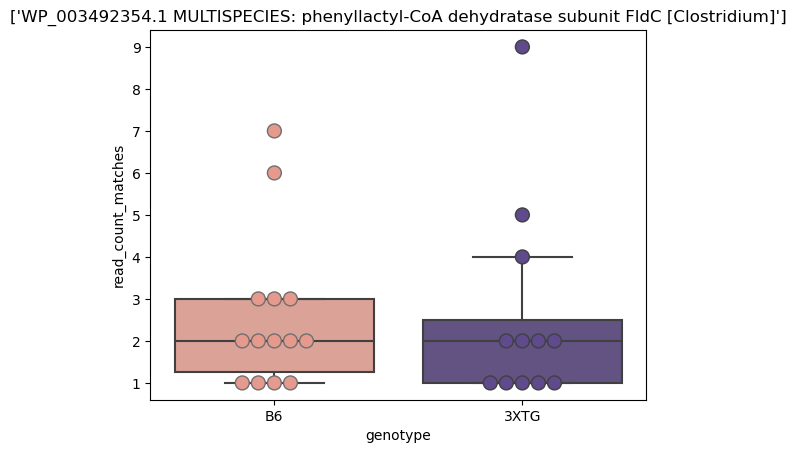

In [53]:
g = sns.boxplot(data=fldC_plotting7, x='genotype', y='read_count_matches',
               order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
g = sns.swarmplot(data=fldC_plotting7, x='genotype', y='read_count_matches',
                 s=10, linewidth=1, order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
plt.title(fldC_plotting7.stitle.unique())
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/fldC_sfilt_boxscatter_mwu-p0.63.png', dpi=150, bbox_inches='tight')

In [48]:
from scipy.stats import mannwhitneyu

In [52]:
B6 = fldC_plotting7[fldC_plotting7['genotype']=='B6'].read_count_matches.values
XTG = fldC_plotting7[fldC_plotting7['genotype']=='3XTG'].read_count_matches.values
mannwhitneyu(B6, XTG, method="exact")

MannwhitneyuResult(statistic=94.0, pvalue=0.6307851765948413)

/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


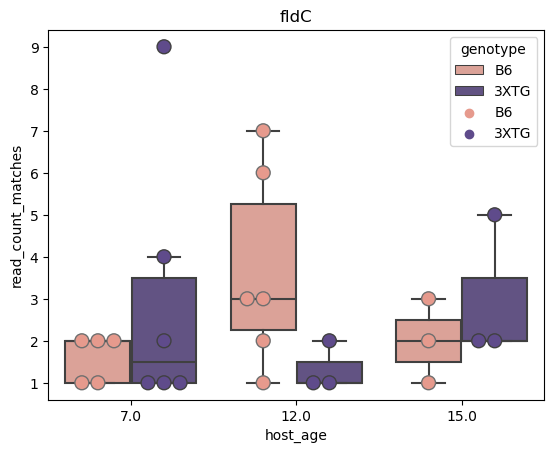

In [54]:
g = sns.boxplot(data=fldC_plotting7, x='host_age', hue='genotype', y='read_count_matches',
               hue_order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
g = sns.swarmplot(data=fldC_plotting7, x='host_age', hue='genotype', y='read_count_matches',
                 s=10, linewidth=1, dodge=True,
                  hue_order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
plt.title("fldC")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/fldC_sfilt_boxscatter_tps.png', dpi=150, bbox_inches='tight')

### hadC

In [74]:
hadC_indv = pd.read_csv('../data/Microbiome/genes_of_interest/hadC-NC_000962.3-M.tuberculosis/3xtg_indv_hadC_blastx_matches.csv')
hadC_indv.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,qstart,qtitle,send,slen,sseqid,sstart,stitle
0,53.1,2.840000e-13,0,363132251,50,25,50.0,150,151,A00953:711:H3W2YDSX7:4:1101:13440:36605,1,A00953:711:H3W2YDSX7:4:1101:13440:36605,198,372,tr|A0A644Y0H0|A0A644Y0H0_9ZZZZ,149,tr|A0A644Y0H0|A0A644Y0H0_9ZZZZ (R)-2-hydroxyis...
1,60.8,5.420000e-16,0,363132251,50,24,52.0,1,151,A00953:711:H3W2YDSX7:4:1105:29866:32894,150,A00953:711:H3W2YDSX7:4:1105:29866:32894,91,408,sp|Q5U924|HADB_CLODI,42,sp|Q5U924|HADB_CLODI (R)-2-hydroxyisocaproyl-C...
2,60.1,1.010000e-15,1,363132251,47,16,59.6,142,151,A00953:711:H3W2YDSX7:4:1105:25626:12743,2,A00953:711:H3W2YDSX7:4:1105:25626:12743,72,408,sp|Q5U924|HADB_CLODI,29,sp|Q5U924|HADB_CLODI (R)-2-hydroxyisocaproyl-C...
3,67.0,3.340000e-18,0,363132251,47,17,63.8,143,151,A00953:711:H3W2YDSX7:4:1132:20817:29309,3,A00953:711:H3W2YDSX7:4:1132:20817:29309,116,388,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,70,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM (R)-2-hydroxyis...
4,68.9,6.880000e-19,0,363132251,47,17,63.8,143,151,A00953:711:H3W2YDSX7:4:1132:23285:30514,3,A00953:711:H3W2YDSX7:4:1132:23285:30514,116,388,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,70,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM (R)-2-hydroxyis...


In [76]:
hadC_ind_md = pd.merge(hadC_indv, metadata[['tube_id2', 'genotype_sex', 'study_type']], 
                       left_on='identification', right_on='tube_id2')
hadC_ind_md.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,qstart,qtitle,send,slen,sseqid,sstart,stitle,tube_id2,genotype_sex,study_type
0,53.1,2.840000e-13,0,363132251,50,25,50.0,150,151,A00953:711:H3W2YDSX7:4:1101:13440:36605,1,A00953:711:H3W2YDSX7:4:1101:13440:36605,198,372,tr|A0A644Y0H0|A0A644Y0H0_9ZZZZ,149,tr|A0A644Y0H0|A0A644Y0H0_9ZZZZ (R)-2-hydroxyis...,363132251.0,3XTG_female,Longitudinal
1,60.8,5.420000e-16,0,363132251,50,24,52.0,1,151,A00953:711:H3W2YDSX7:4:1105:29866:32894,150,A00953:711:H3W2YDSX7:4:1105:29866:32894,91,408,sp|Q5U924|HADB_CLODI,42,sp|Q5U924|HADB_CLODI (R)-2-hydroxyisocaproyl-C...,363132251.0,3XTG_female,Longitudinal
2,60.1,1.010000e-15,1,363132251,47,16,59.6,142,151,A00953:711:H3W2YDSX7:4:1105:25626:12743,2,A00953:711:H3W2YDSX7:4:1105:25626:12743,72,408,sp|Q5U924|HADB_CLODI,29,sp|Q5U924|HADB_CLODI (R)-2-hydroxyisocaproyl-C...,363132251.0,3XTG_female,Longitudinal
3,67.0,3.340000e-18,0,363132251,47,17,63.8,143,151,A00953:711:H3W2YDSX7:4:1132:20817:29309,3,A00953:711:H3W2YDSX7:4:1132:20817:29309,116,388,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,70,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM (R)-2-hydroxyis...,363132251.0,3XTG_female,Longitudinal
4,68.9,6.880000e-19,0,363132251,47,17,63.8,143,151,A00953:711:H3W2YDSX7:4:1132:23285:30514,3,A00953:711:H3W2YDSX7:4:1132:23285:30514,116,388,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM,70,tr|A0A7U9SZ39|A0A7U9SZ39_9FIRM (R)-2-hydroxyis...,363132251.0,3XTG_female,Longitudinal


In [77]:
hadC_ind_md.shape

(79741, 20)

In [78]:
hadC_ind_md2 = hadC_ind_md[hadC_ind_md['pident']>45].copy()
hadC_ind_md2.shape
#should have been pre-filtered for this value

(56861, 20)

In [79]:
hadC_ind_sac = hadC_ind_md2[hadC_ind_md2['study_type']=='Sacrifice'].copy()
hadC_ind_sac.shape

(9399, 20)

In [80]:
hadC_ind_sac_min = hadC_ind_sac[['stitle', 'genotype_sex', 'pident']].copy()
hadC_ind_sac_min.head()

,stitle,genotype_sex,pident
456,tr|A0A4Y7RQU8|A0A4Y7RQU8_9FIRM (R)-2-hydroxyis...,3XTG_male,69.2
458,tr|A0A644XQ29|A0A644XQ29_9ZZZZ (R)-2-hydroxyis...,3XTG_male,53.3
460,tr|A0A544VYC9|A0A544VYC9_9MYCO UPF0336 protein...,3XTG_male,52.9
461,tr|A0A7U9SJJ0|A0A7U9SJJ0_9FIRM (R)-2-hydroxyis...,3XTG_male,72.0
462,tr|A0A5K7ZL70|A0A5K7ZL70_9BACT R-phenyllactate...,3XTG_male,46.7


In [89]:
hadC_summary = hadC_ind_sac_min.groupby(['stitle', 'genotype_sex']).count()
hadC_summary.reset_index()

,stitle,genotype_sex,pident
0,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG_female,11
1,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG_male,5
2,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,B6_female,7
3,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,B6_male,6
4,sp|Q5U924|HADB_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG_female,249
...,...,...,...
222,tr|Q9VKD2|Q9VKD2_DROME Very-long-chain (3R)-3-...,B6_male,3
223,tr|W8BUI6|W8BUI6_CERCA Very-long-chain (3R)-3-...,3XTG_female,5
224,tr|W8BUI6|W8BUI6_CERCA Very-long-chain (3R)-3-...,3XTG_male,4
225,tr|W8BUI6|W8BUI6_CERCA Very-long-chain (3R)-3-...,B6_female,7


In [90]:
len(hadC_summary.reset_index().stitle.unique())

63

In [101]:
hadC_summary.to_csv('../data/Microbiome/genes_of_interest/hadC-NC_000962.3-M.tuberculosis/3xtg_indv_hadC_summary_counts.csv')

In [139]:
hadC_plotting = pd.merge(hadC_indv, metadata[['tube_id2', 'genotype', 'study_type', 'host_subject_id']], 
                       left_on='identification', right_on='tube_id2')
hadC_plotting2 = hadC_plotting[hadC_plotting['pident']>45].copy()
hadC_plotting3 = hadC_plotting2[hadC_plotting2['study_type']=='Sacrifice'].copy()
hadC_plotting4 = hadC_plotting3[['stitle', 'genotype', 'host_subject_id', 'pident']].copy()
hadC_plotting5 = hadC_plotting4.groupby(['stitle', 'genotype', 'host_subject_id']).count().reset_index()
hadC_plotting5.rename(columns={'pident':'read_count_matches'}, inplace=True)
hadC_plotting5.head()

,stitle,genotype,host_subject_id,read_count_matches
0,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG,CAGE 1,2
1,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG,CAGE 20,1
2,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG,CAGE 21,2
3,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG,CAGE 40,2
4,sp|Q5U923|HADC_CLODI (R)-2-hydroxyisocaproyl-C...,3XTG,CAGE 42,1


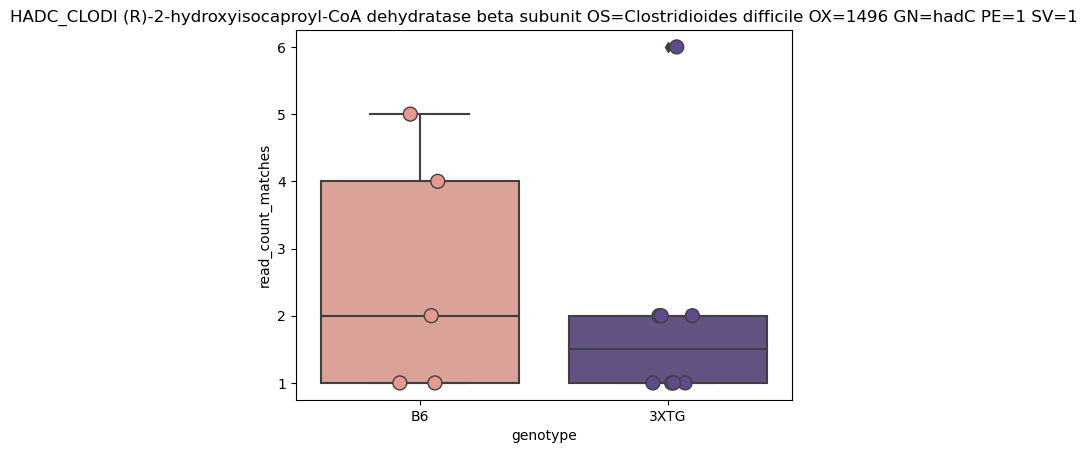

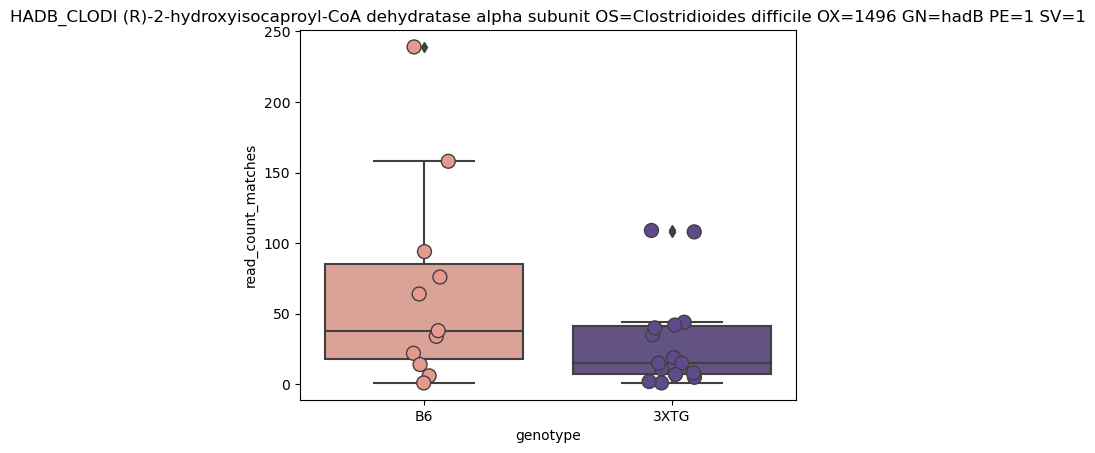

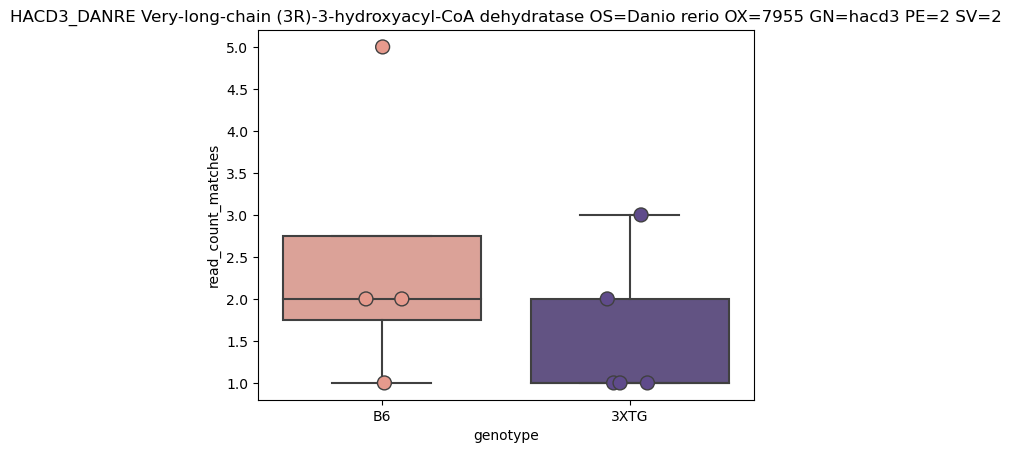

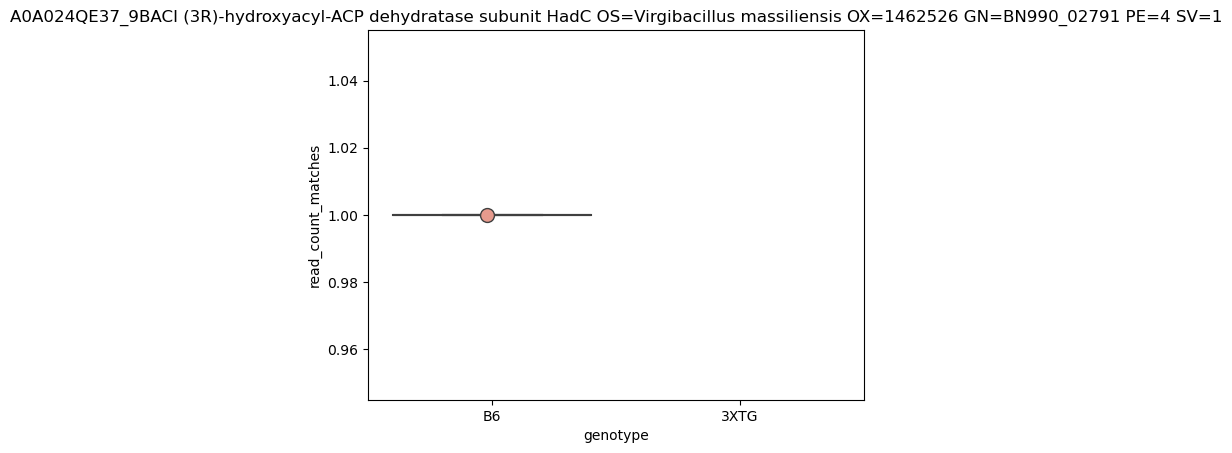

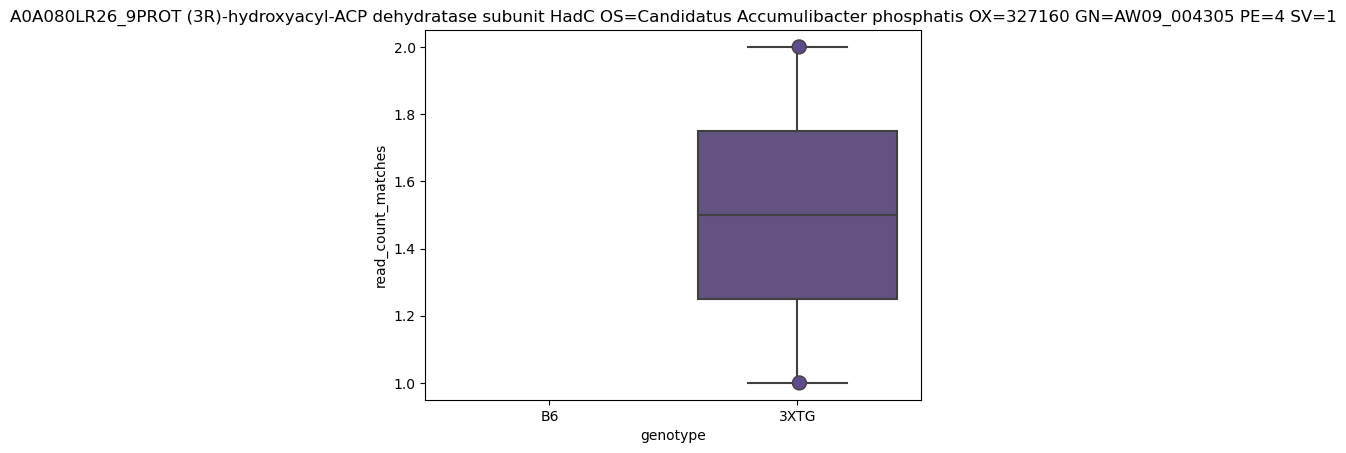

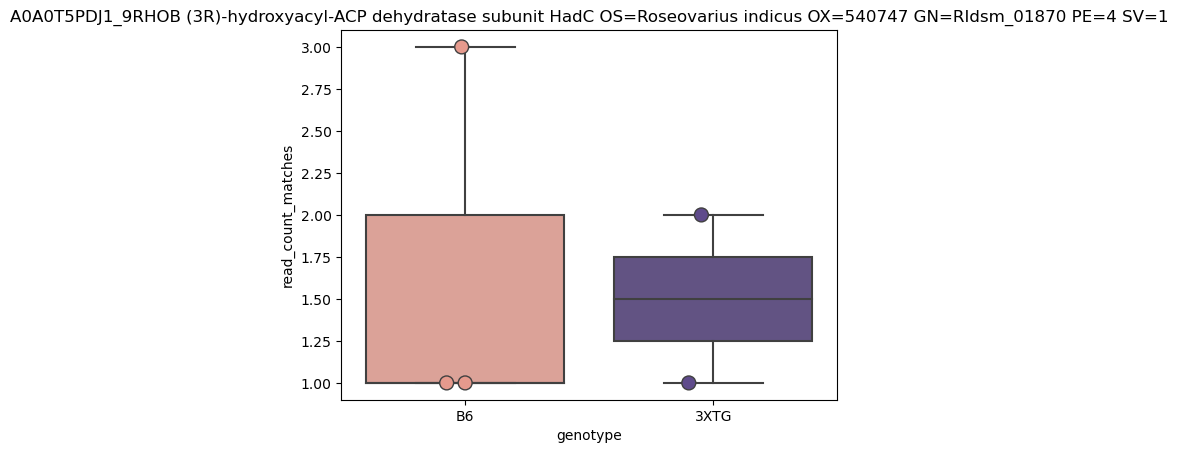

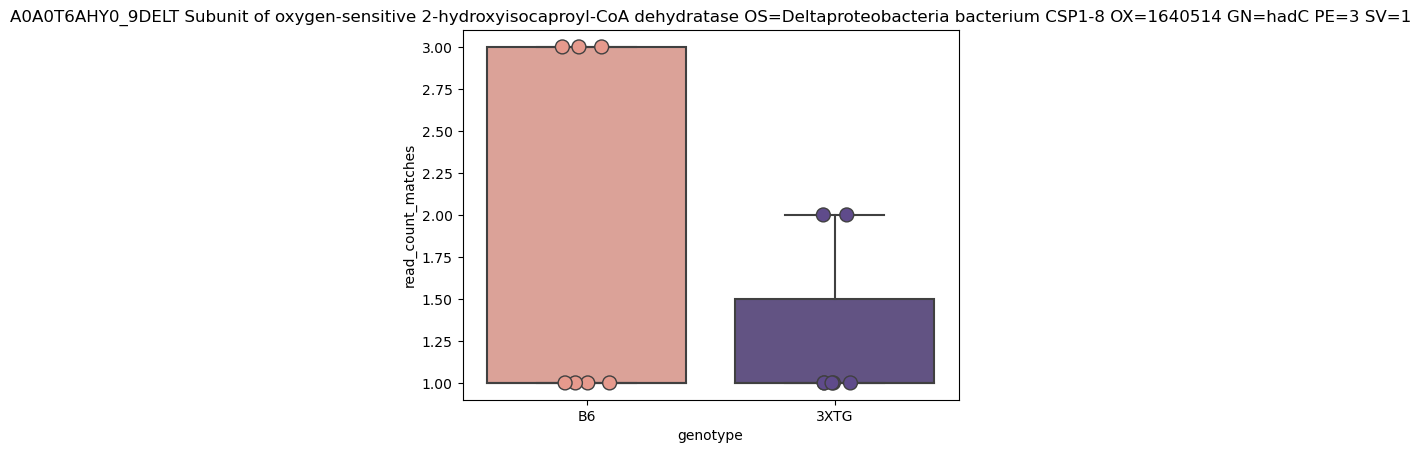

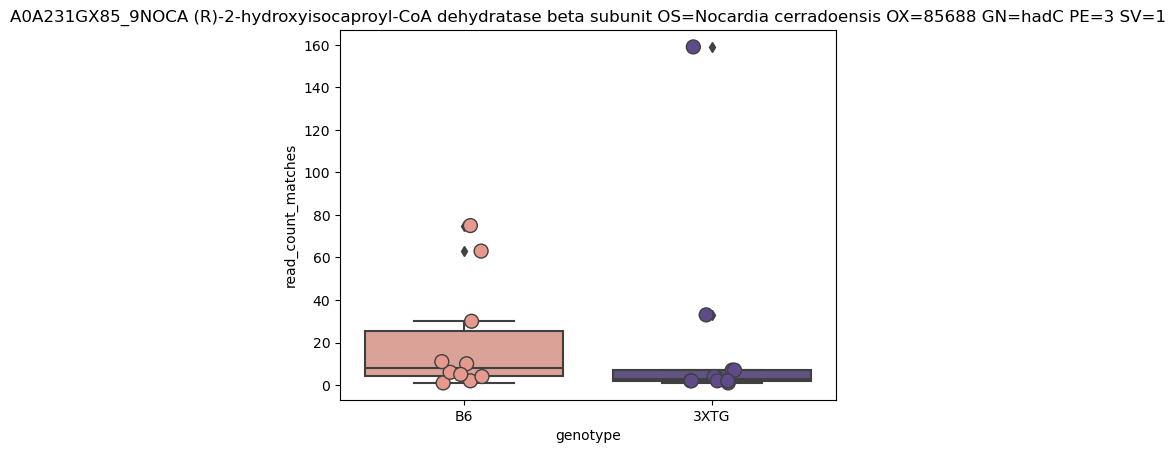

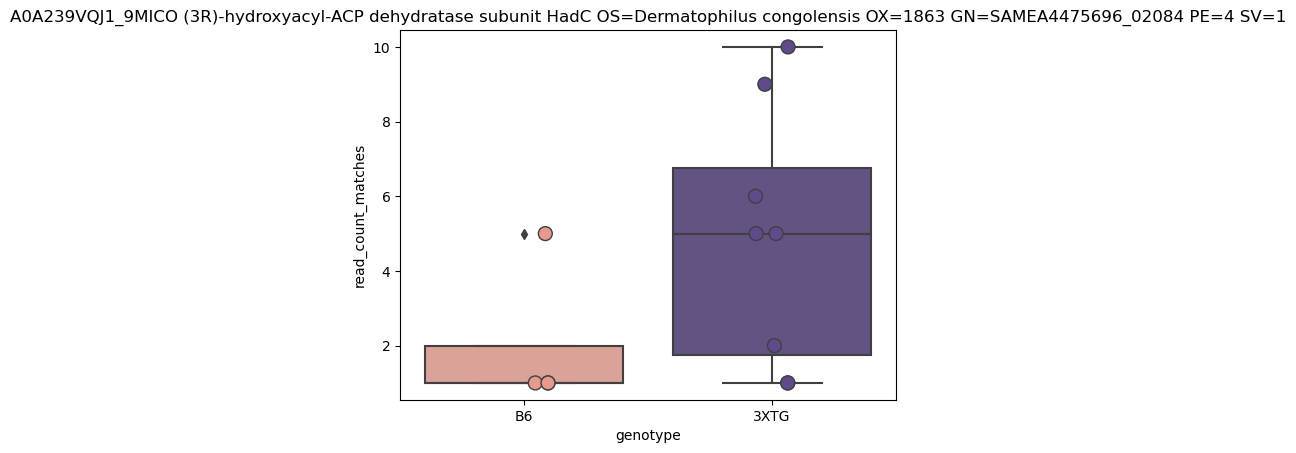

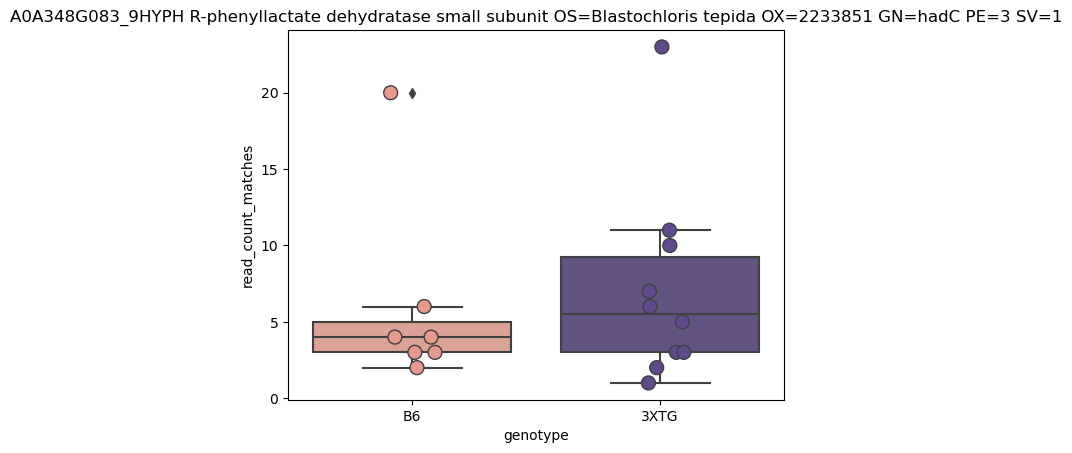

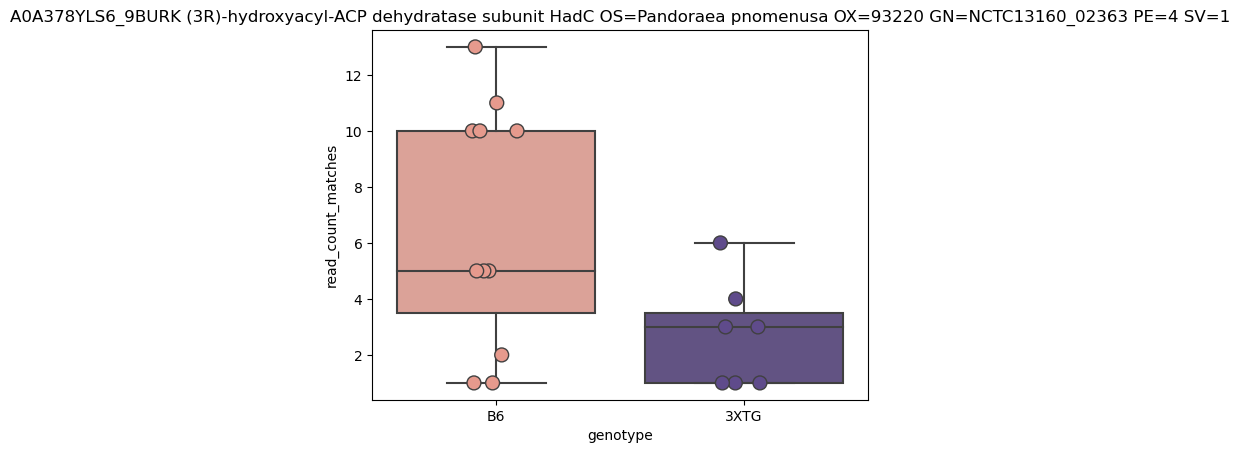

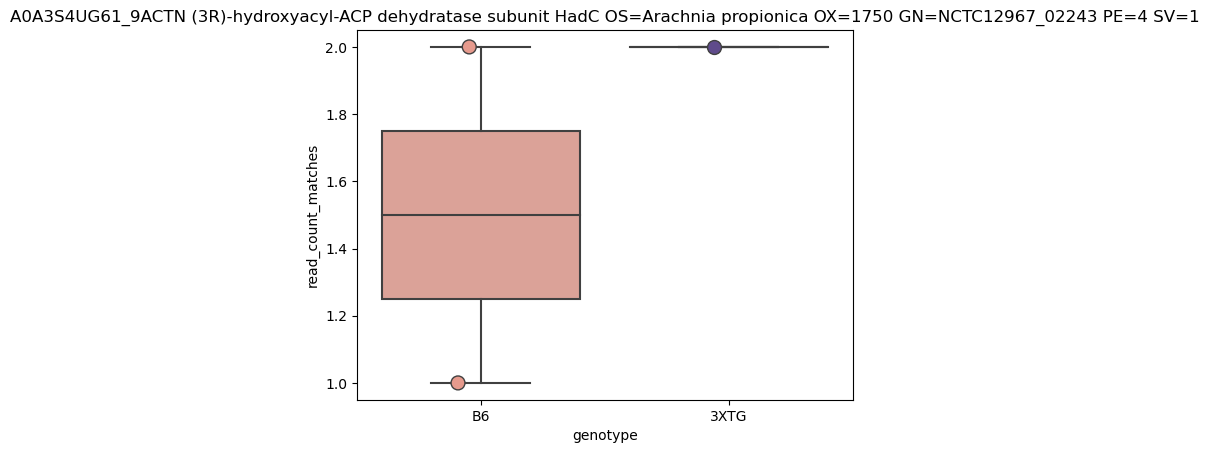

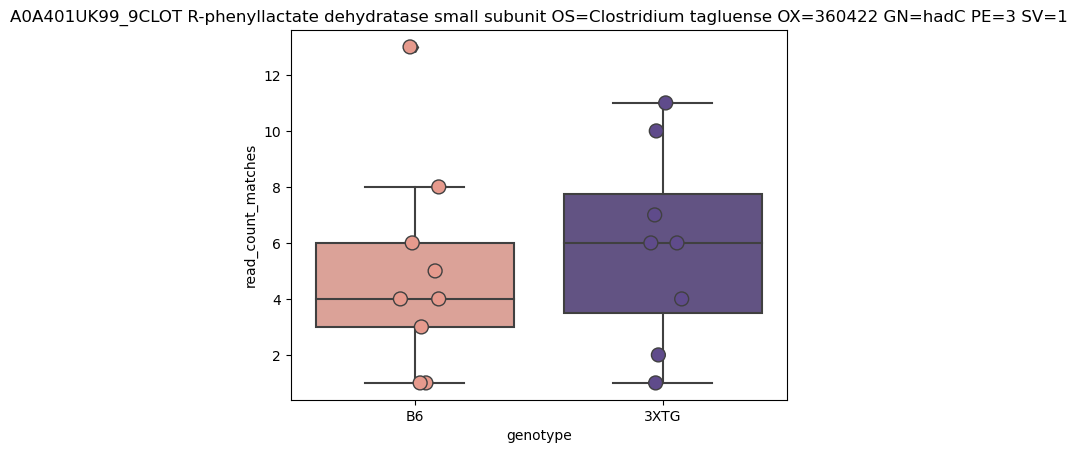

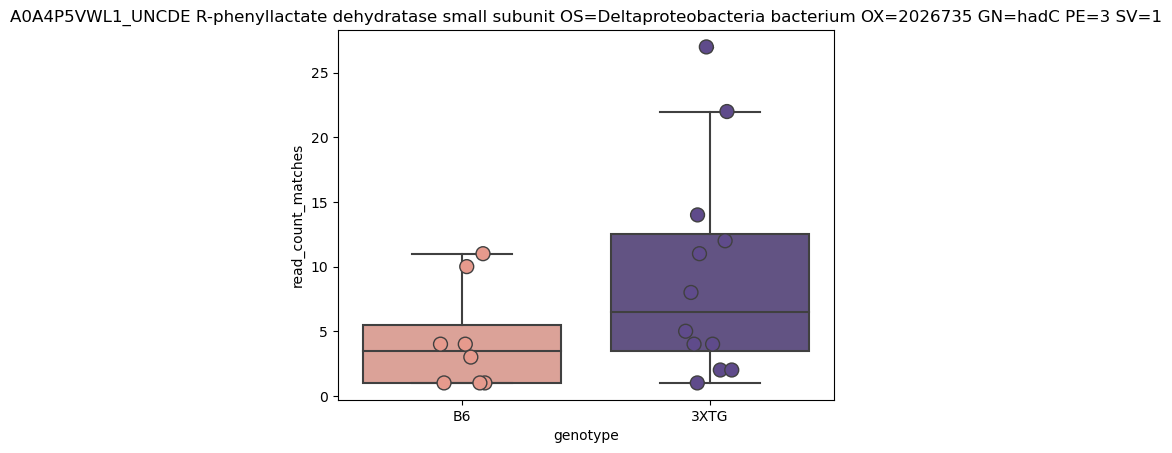

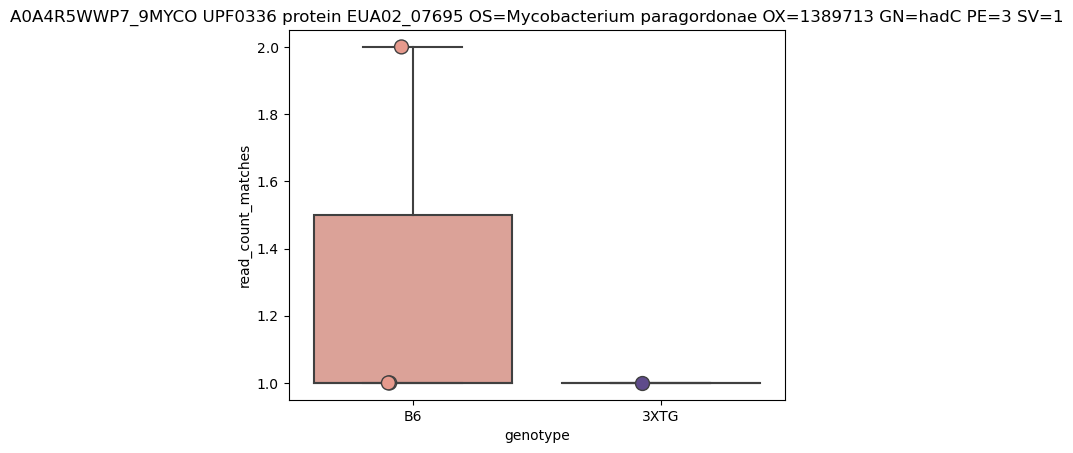

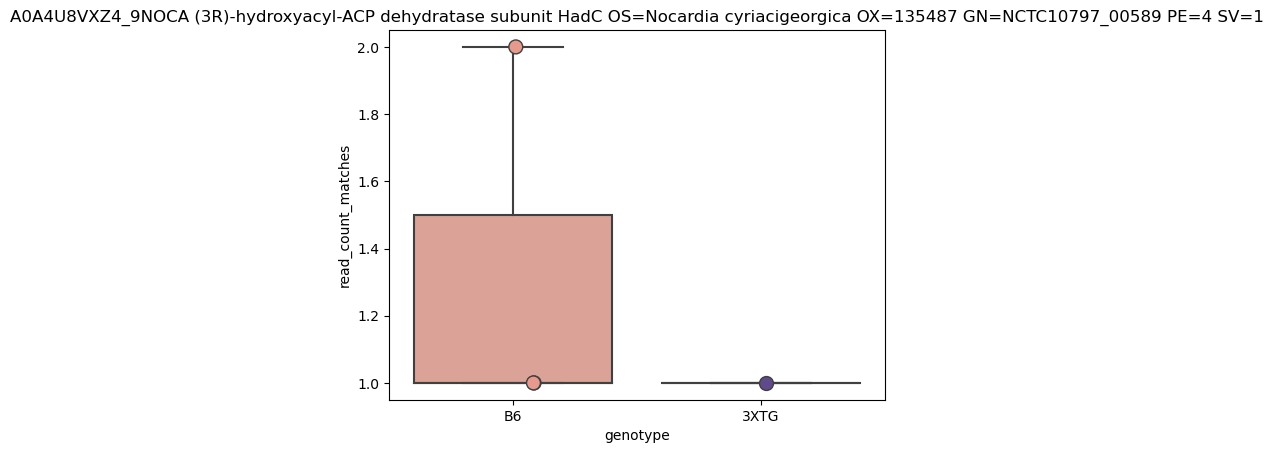

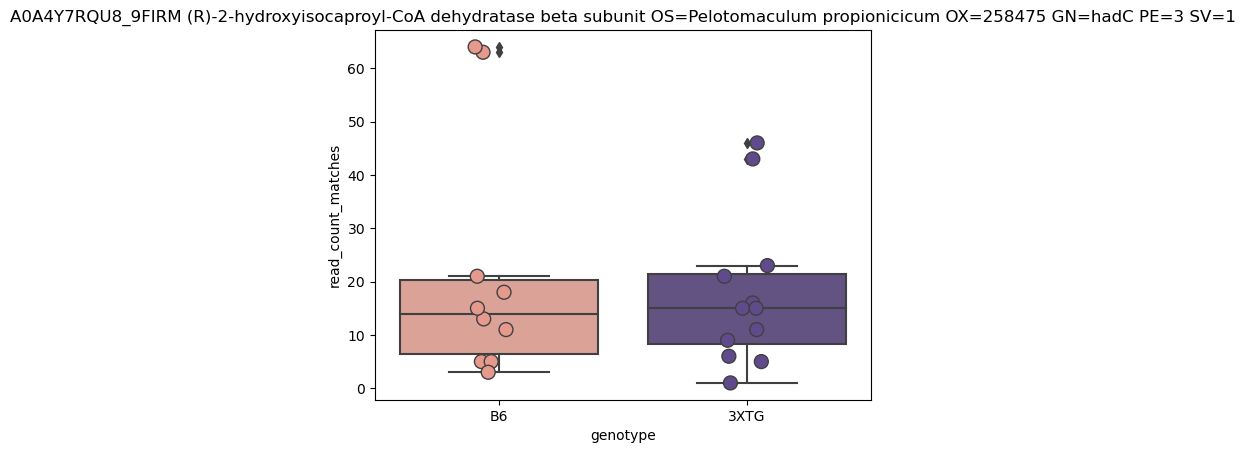

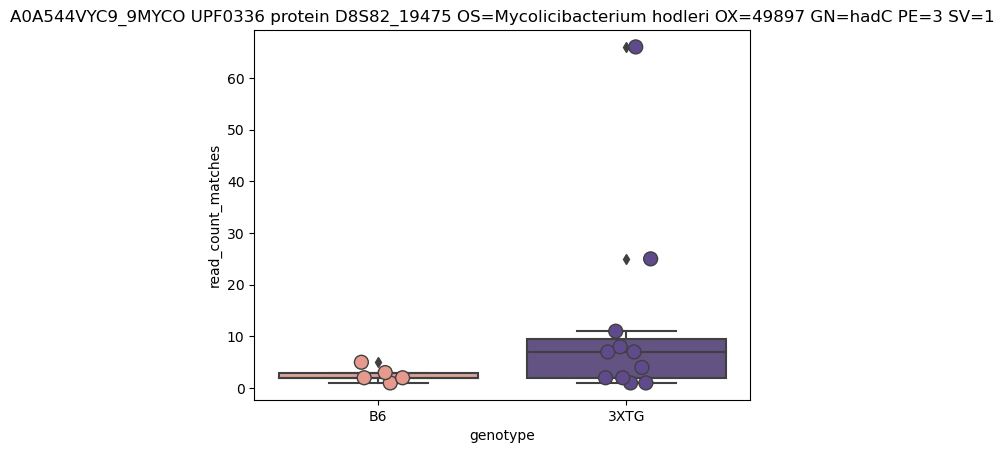

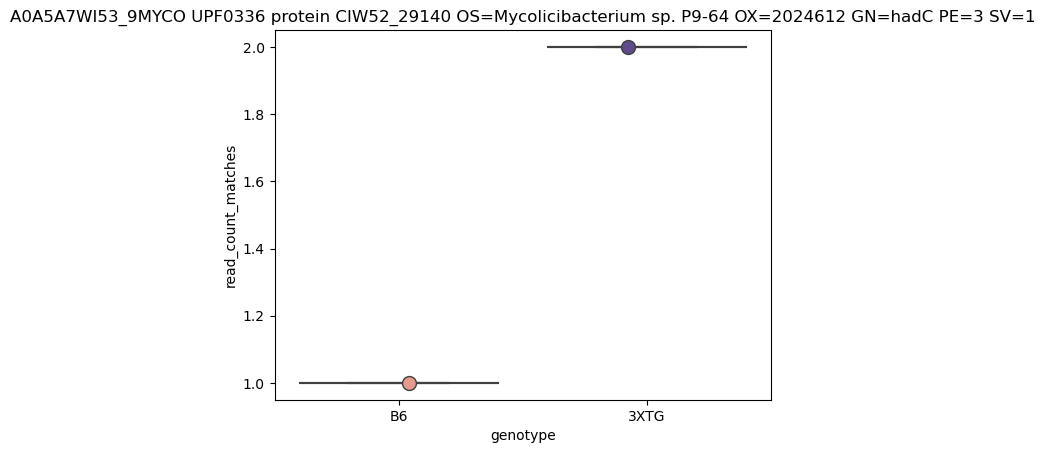

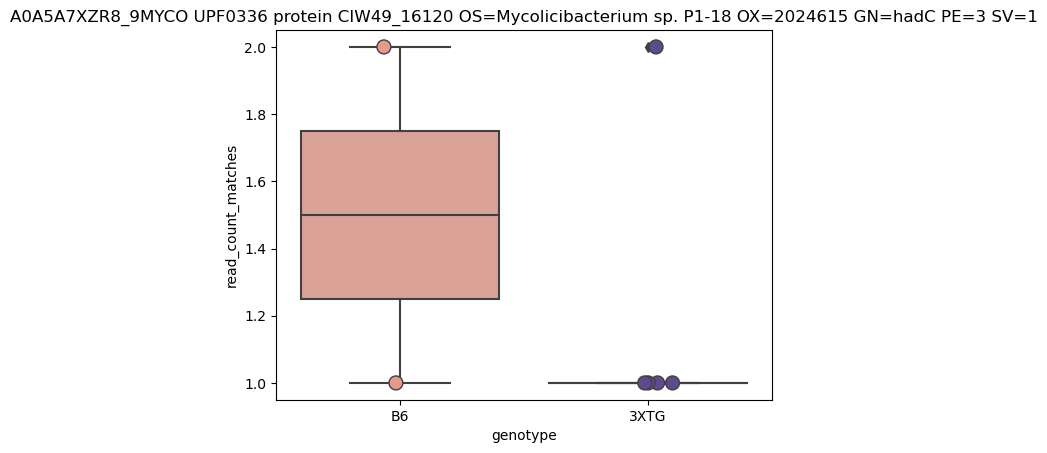

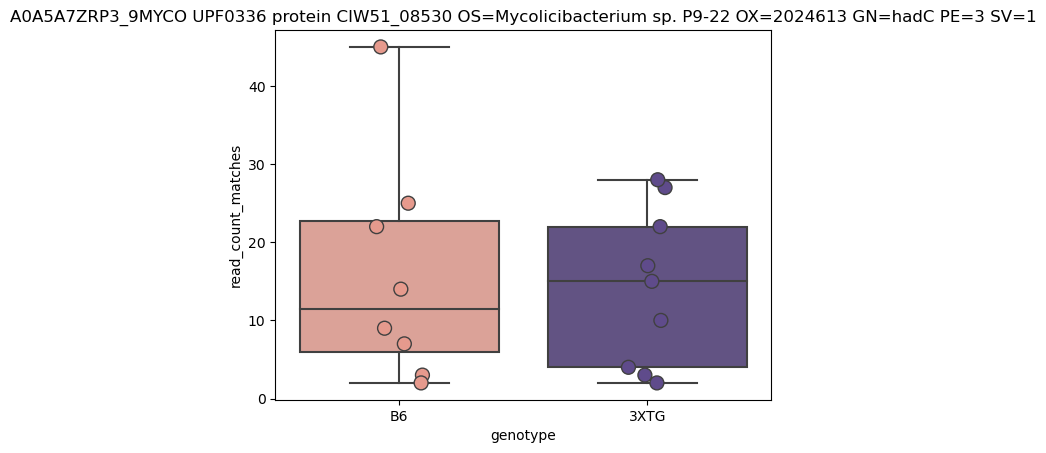

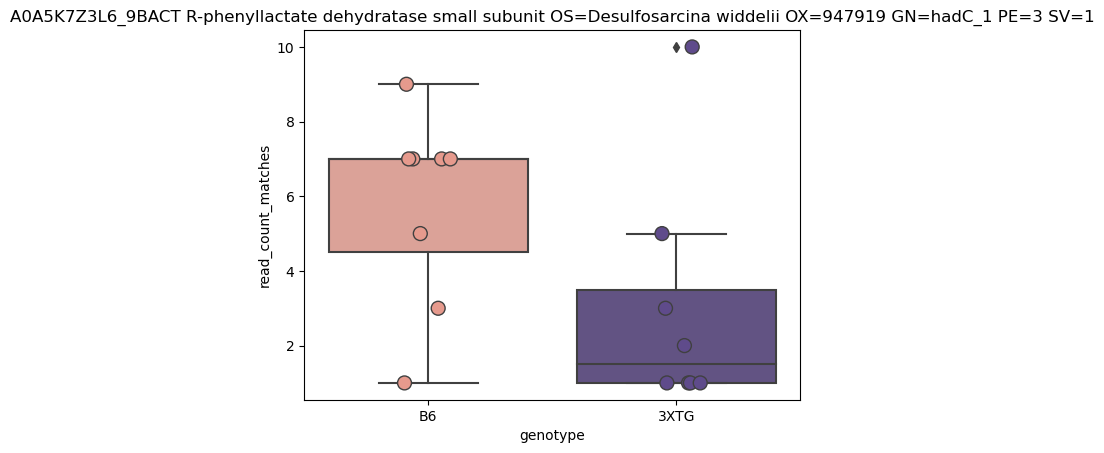

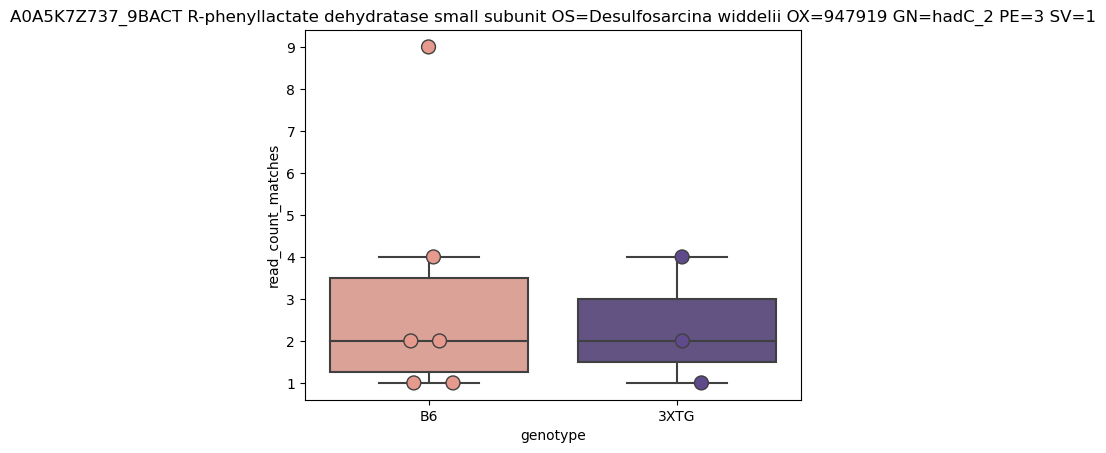

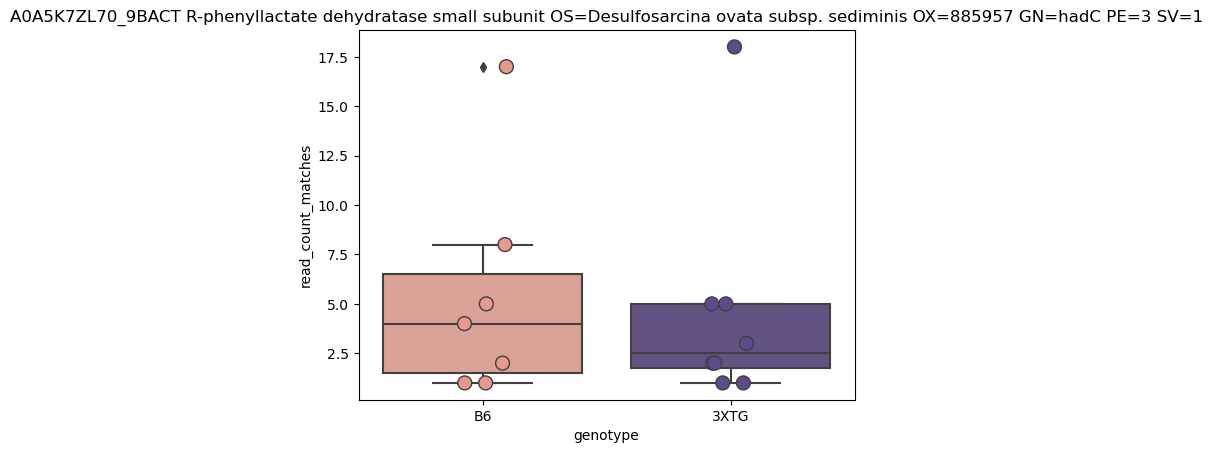

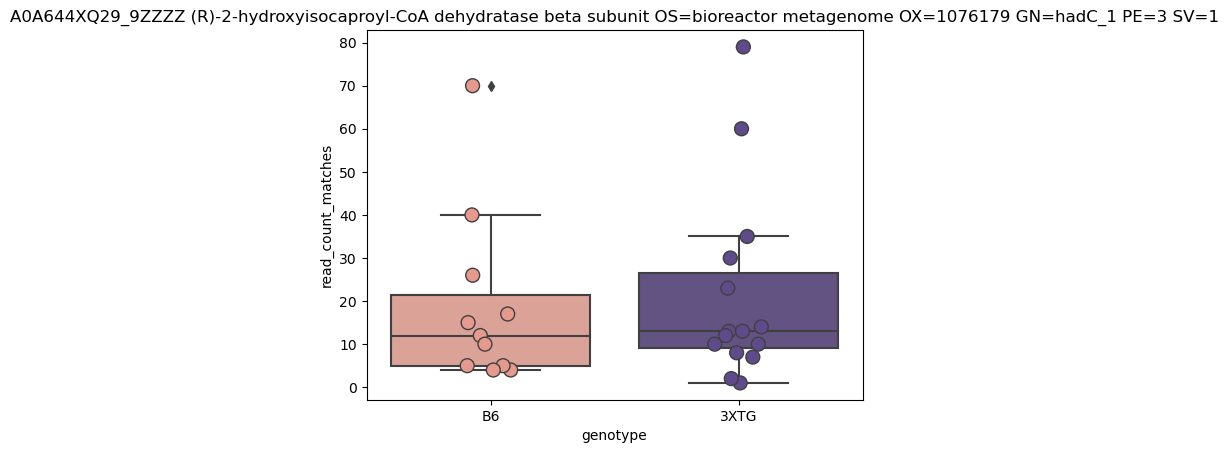

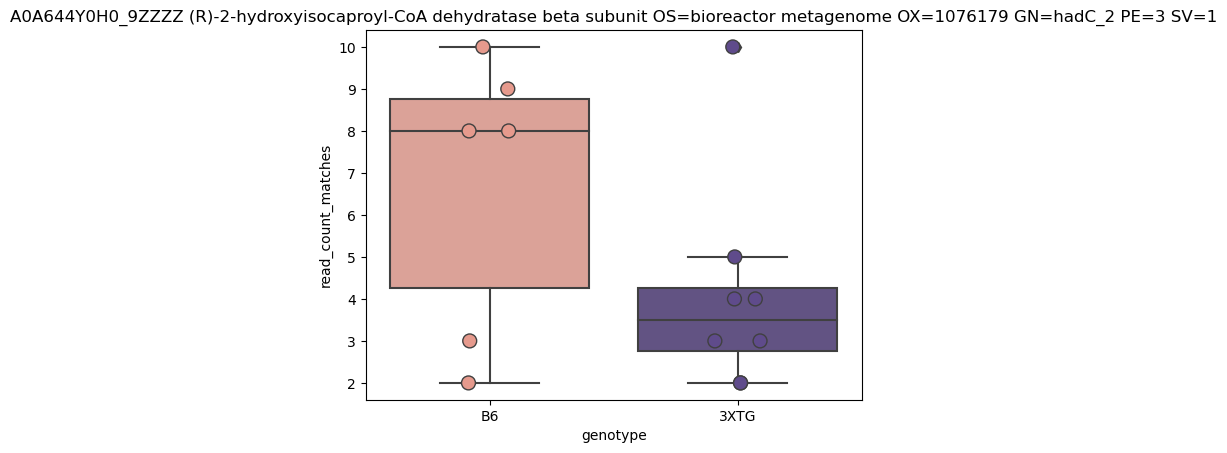

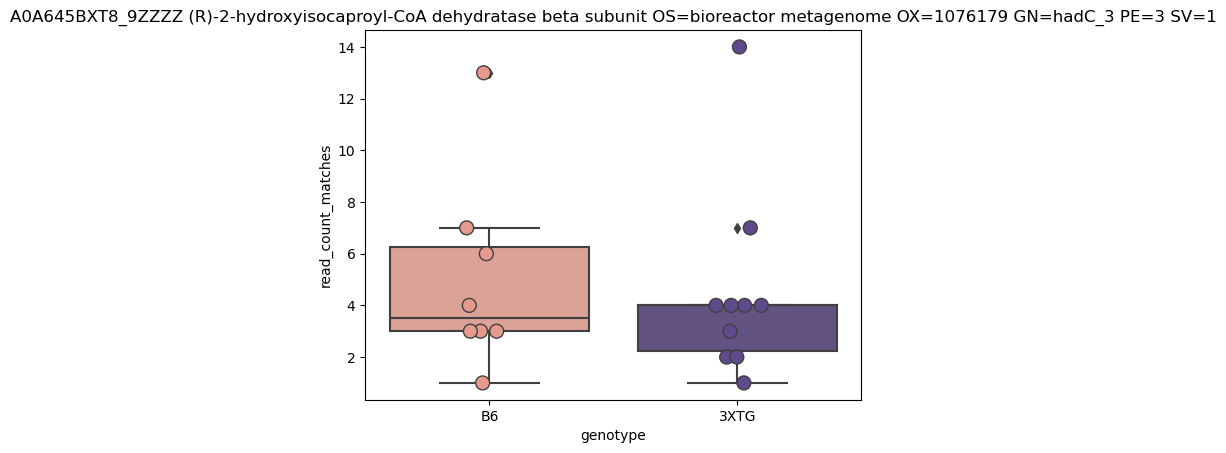

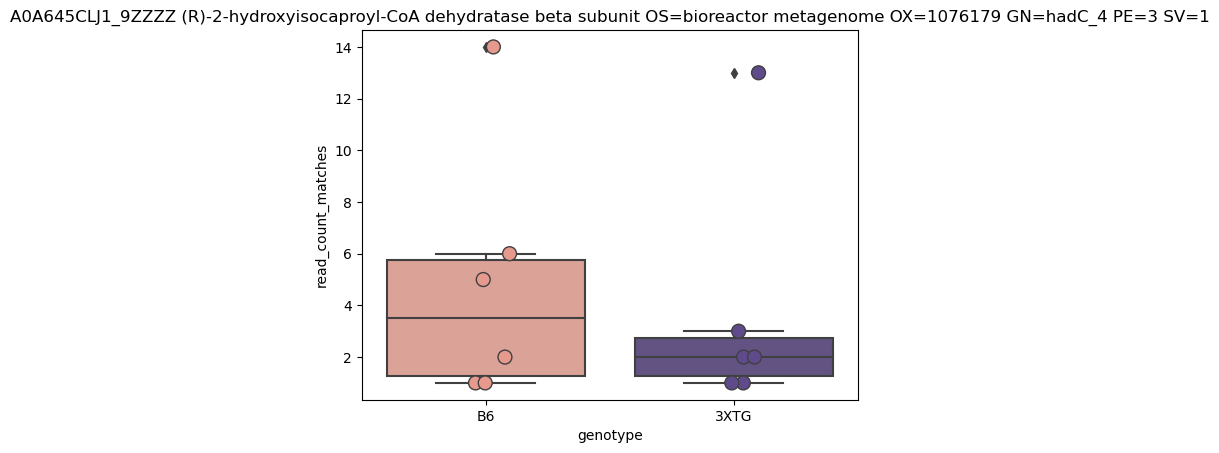

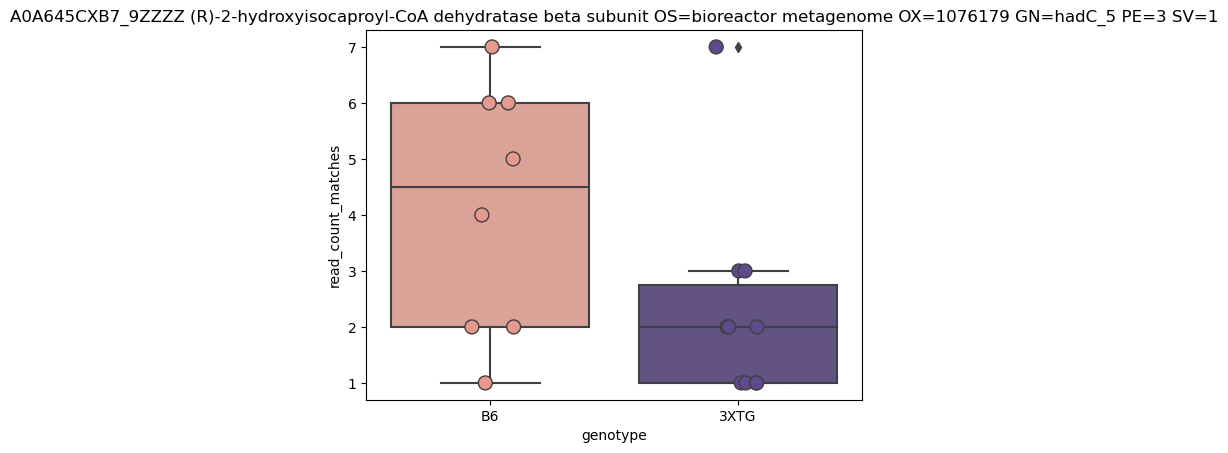

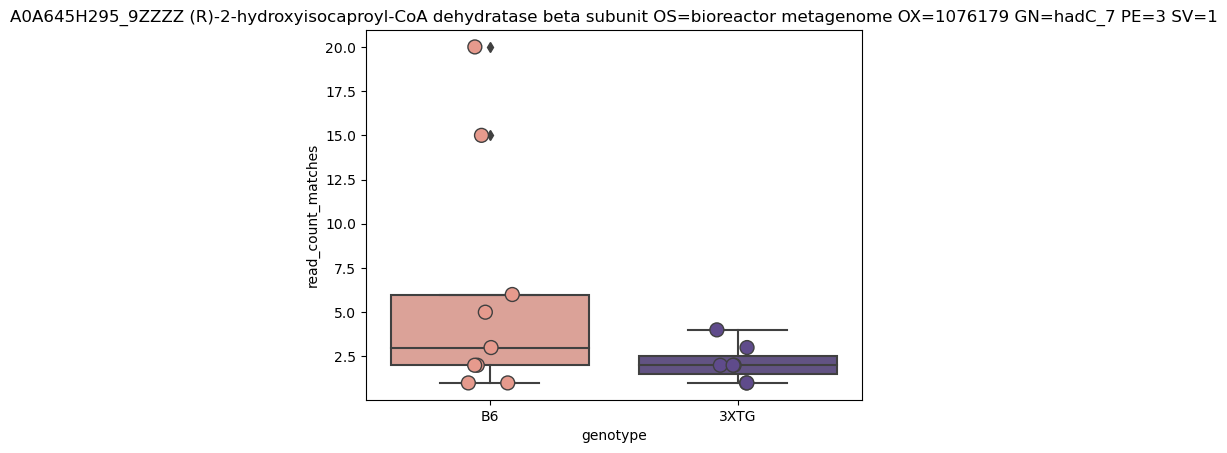

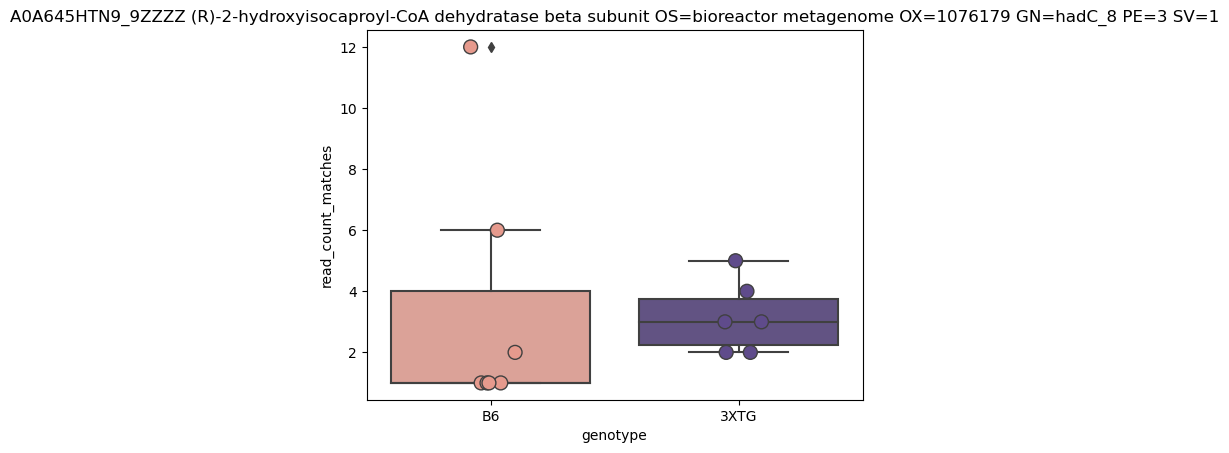

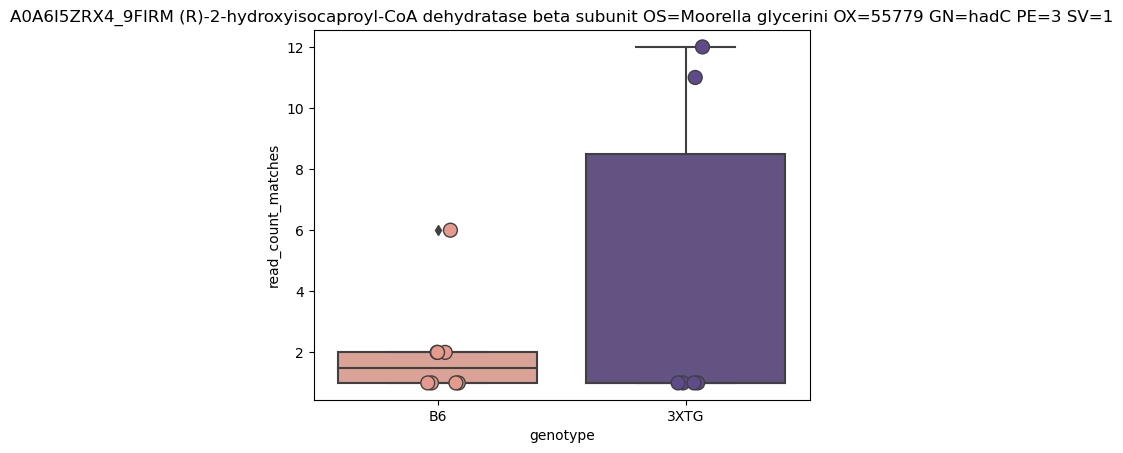

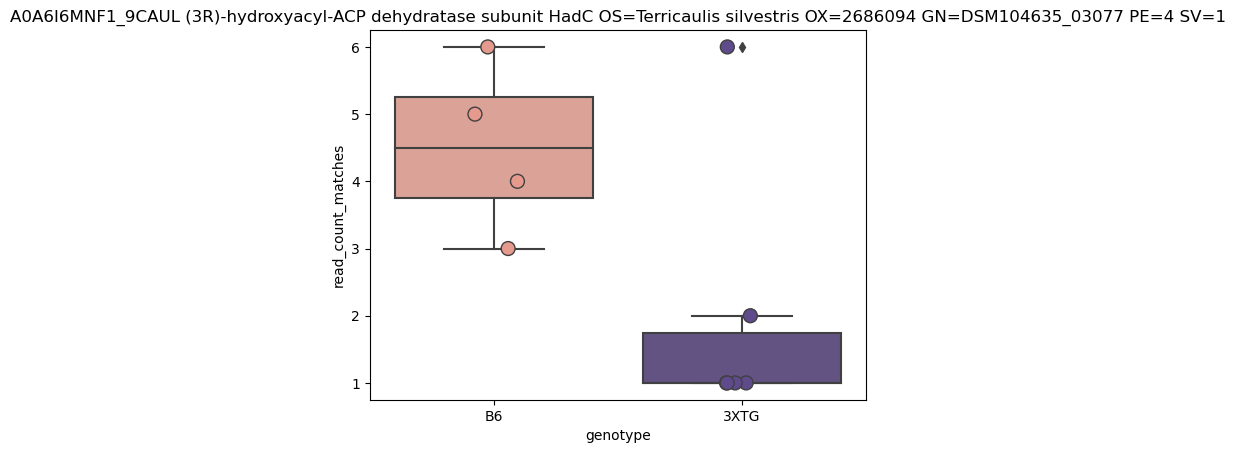

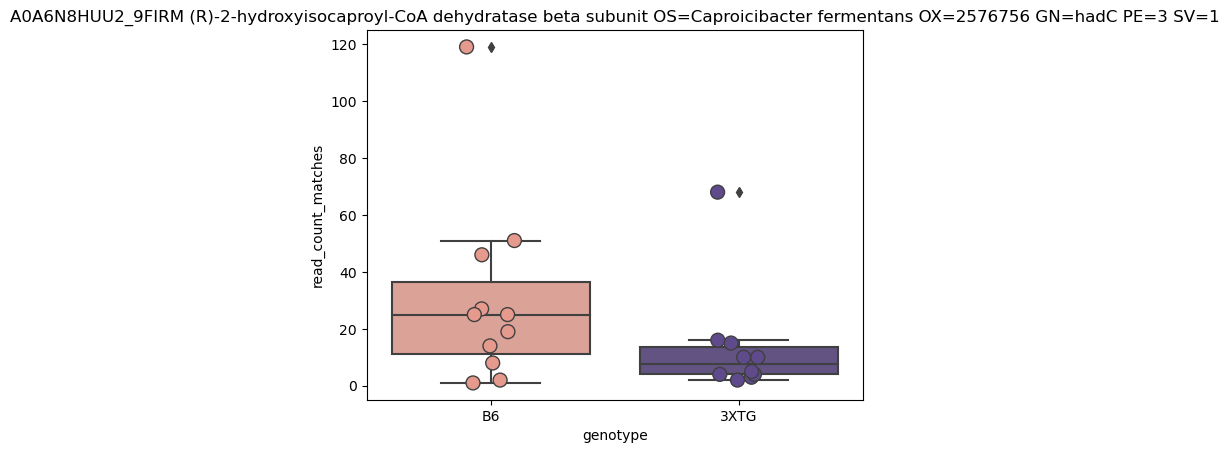

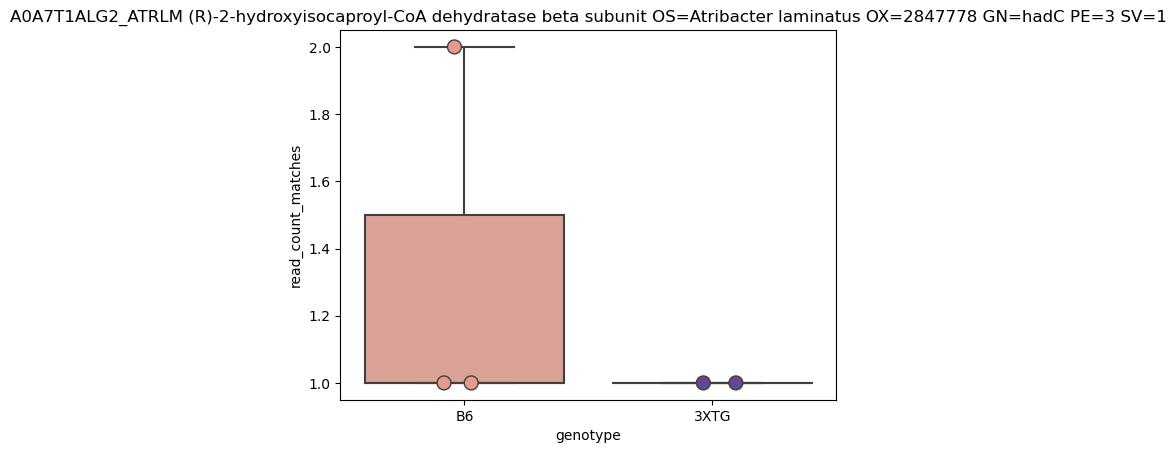

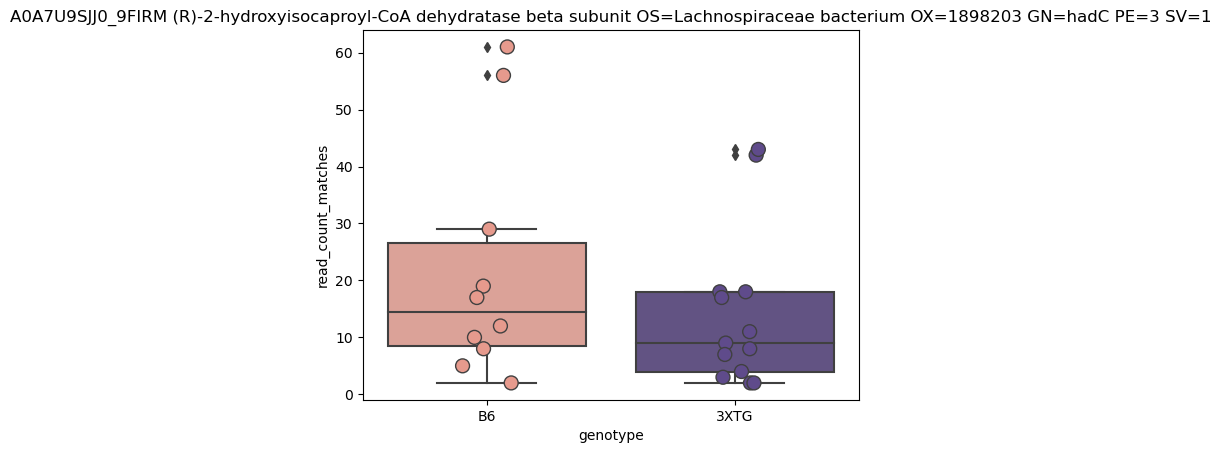

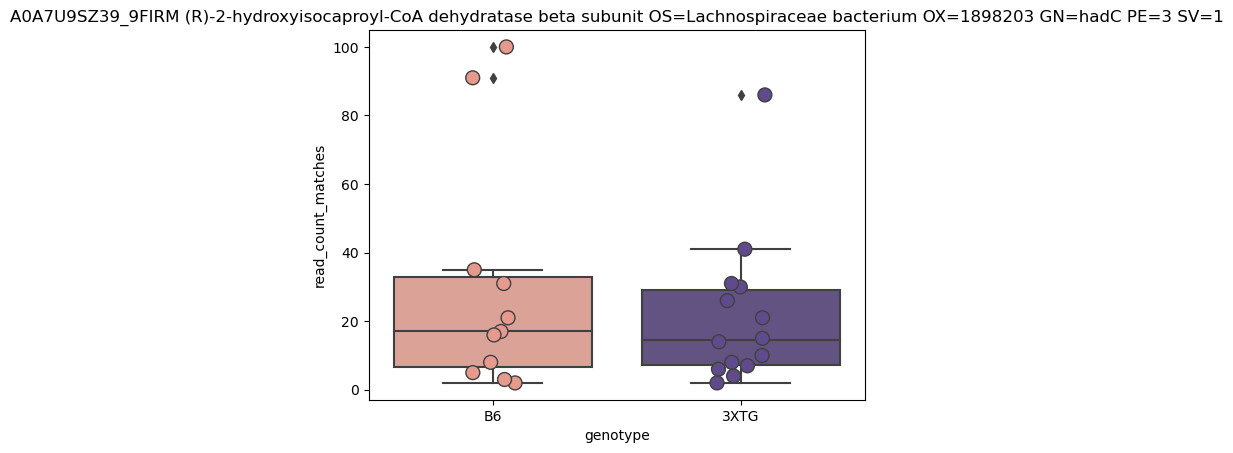

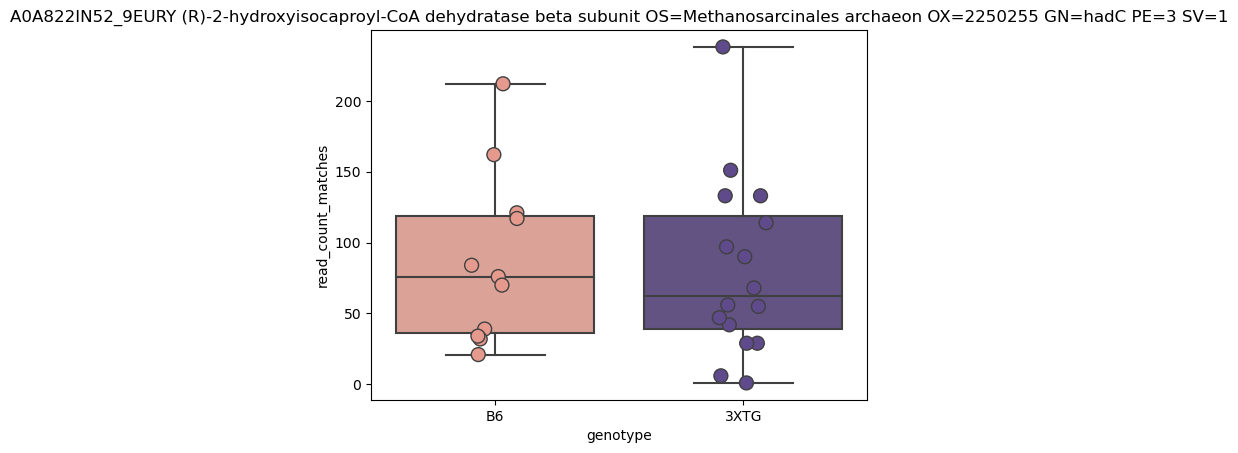

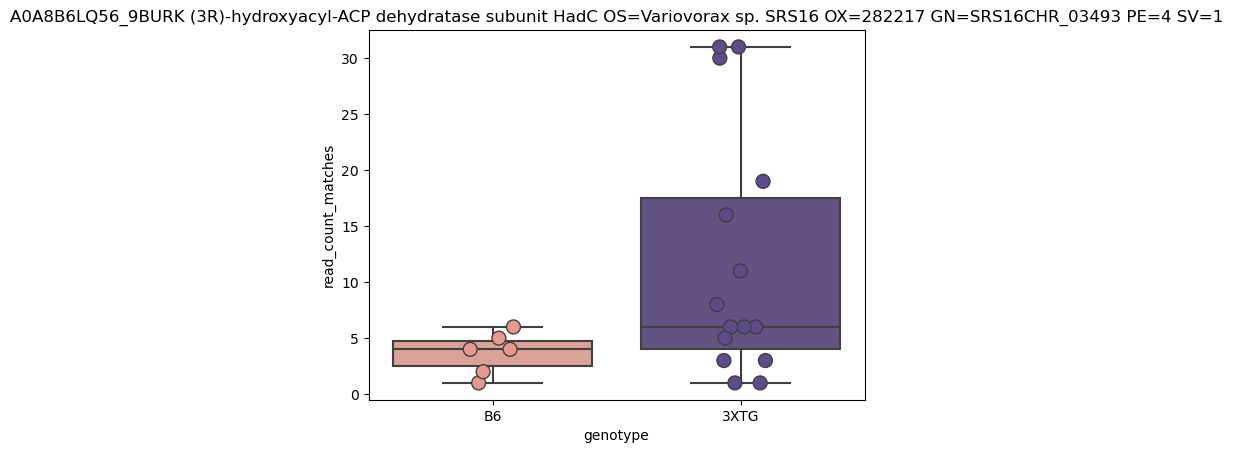

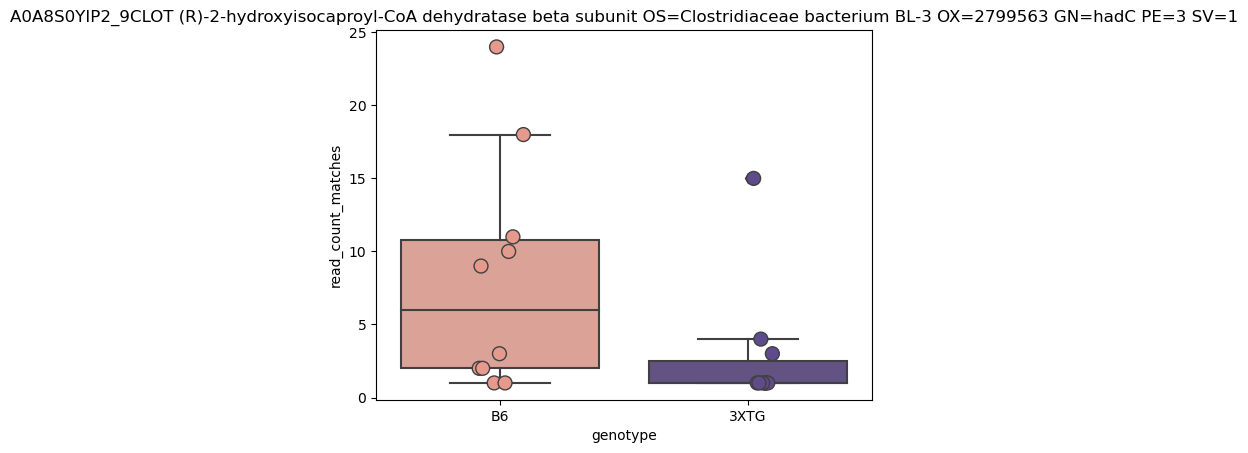

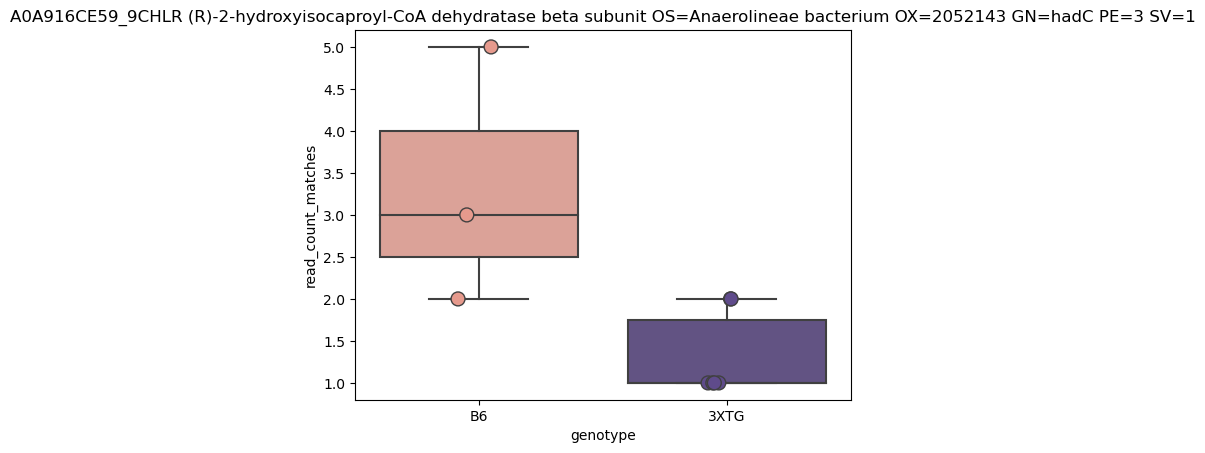

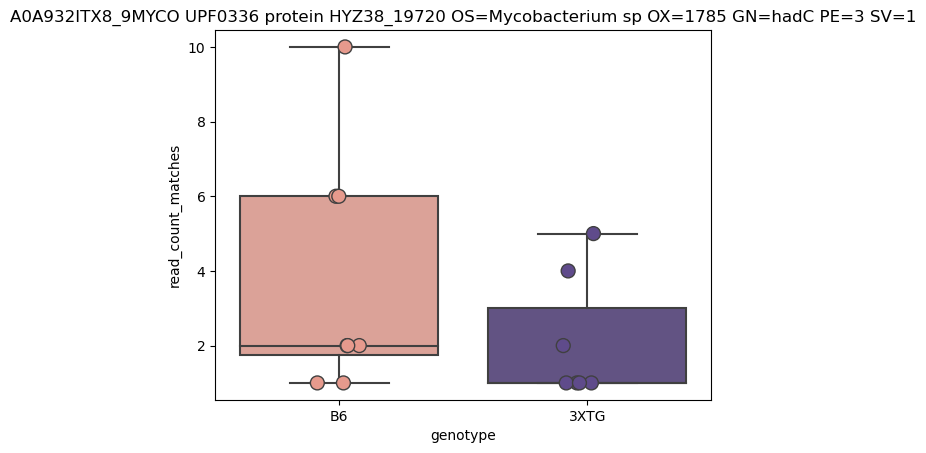

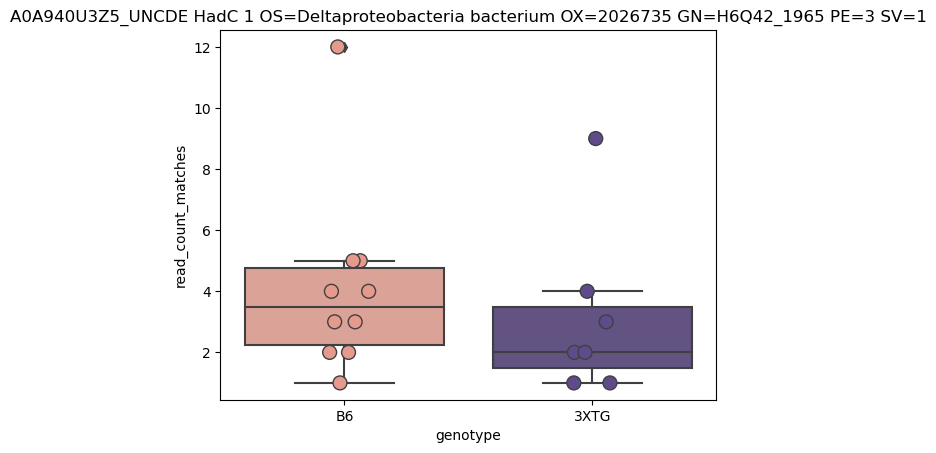

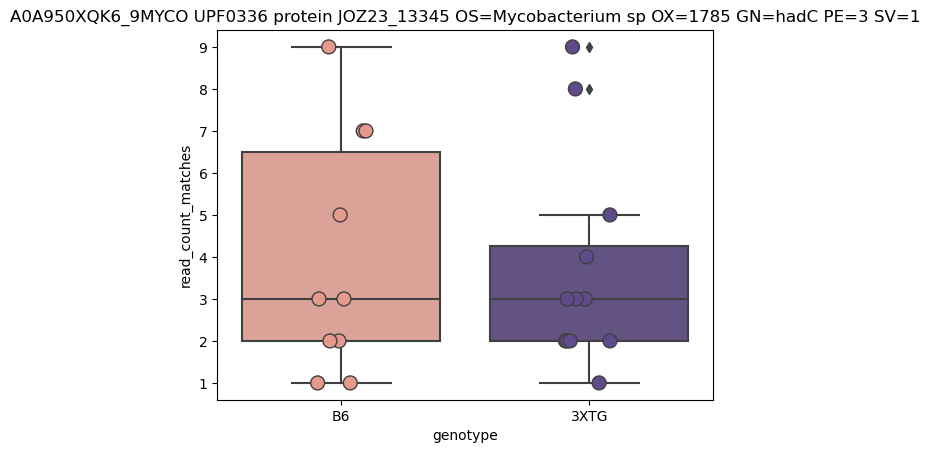

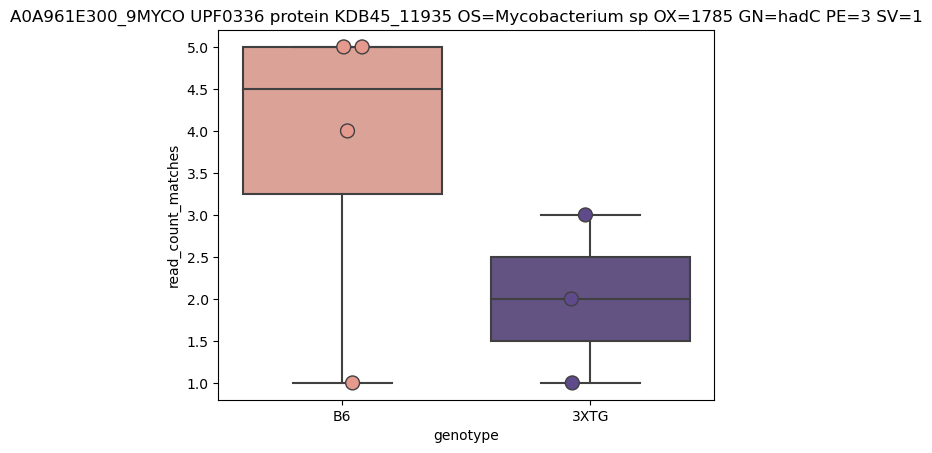

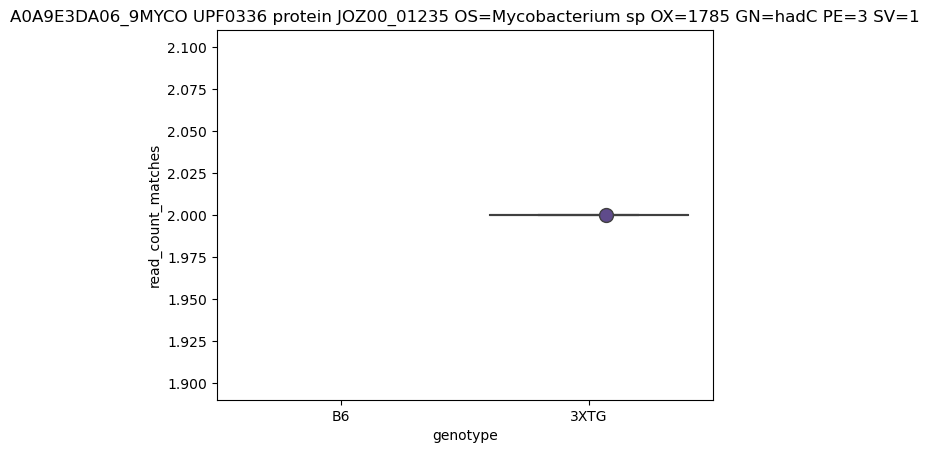

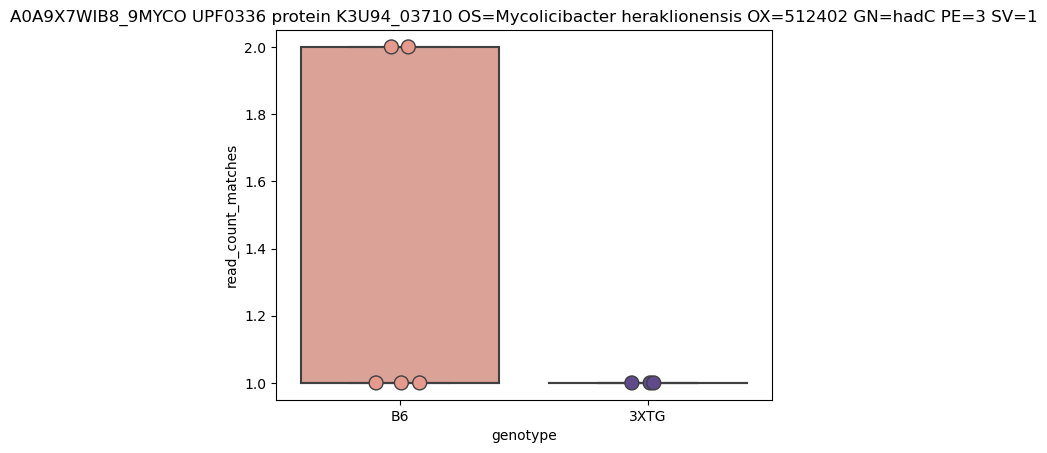

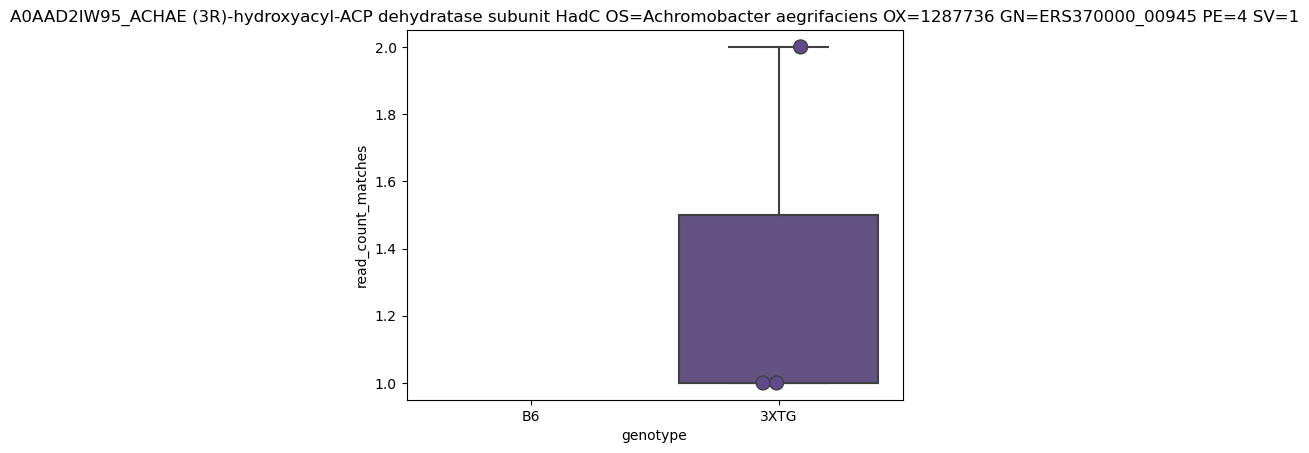

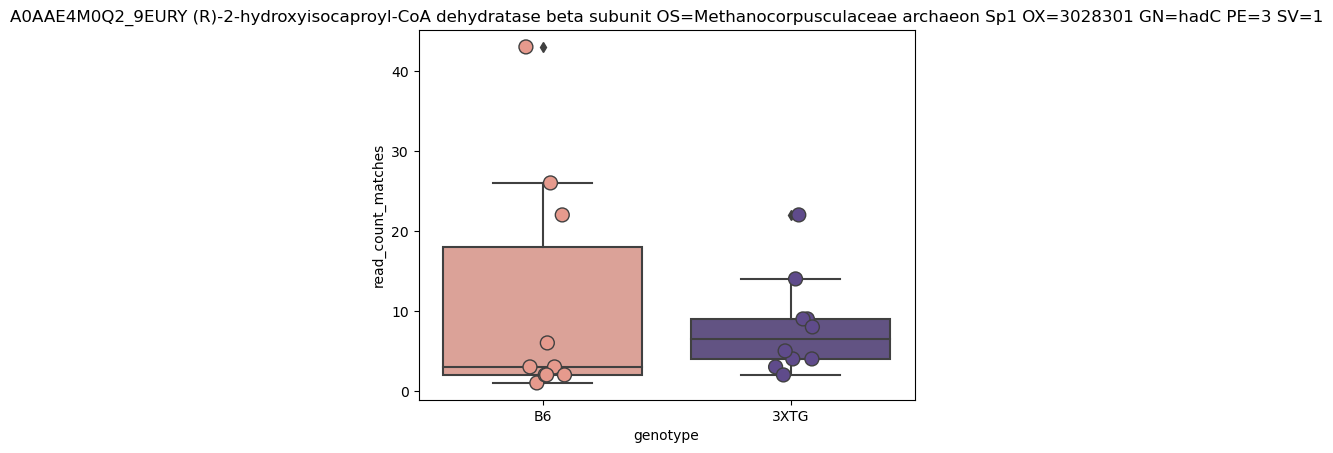

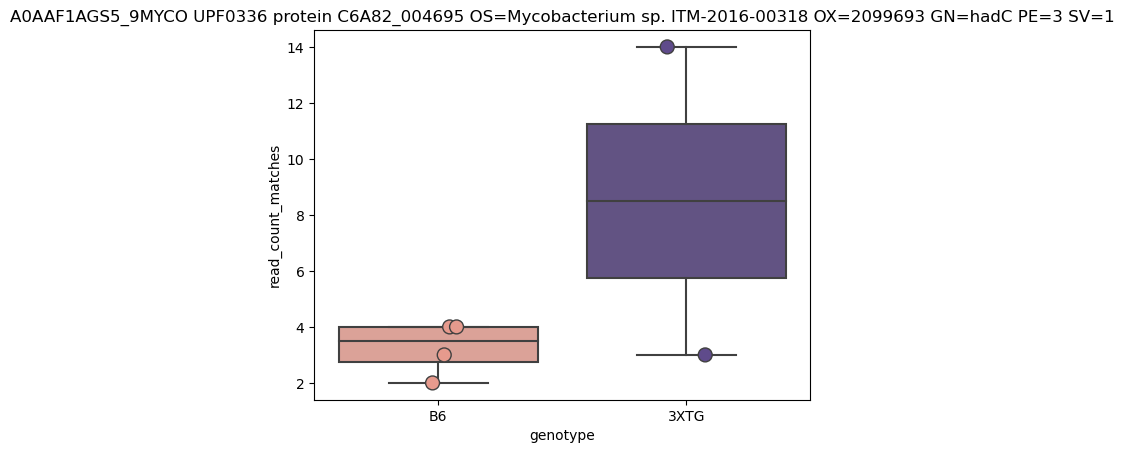

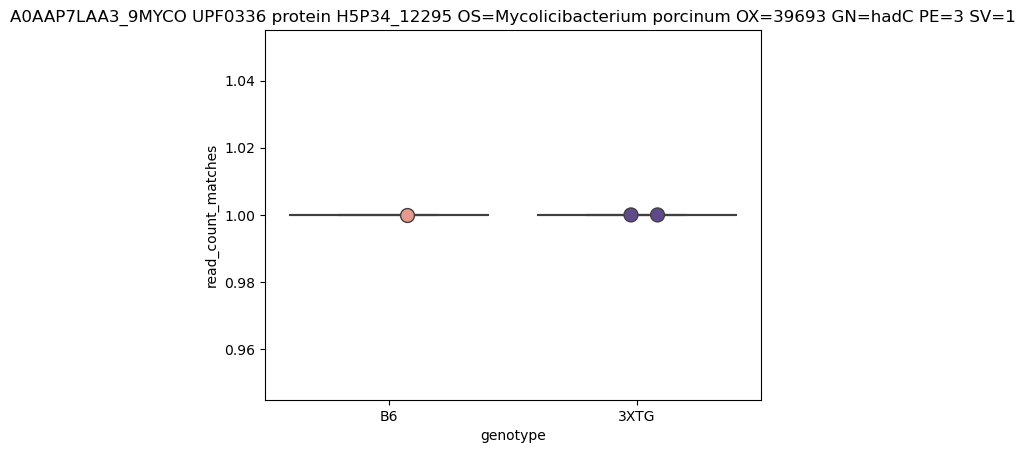

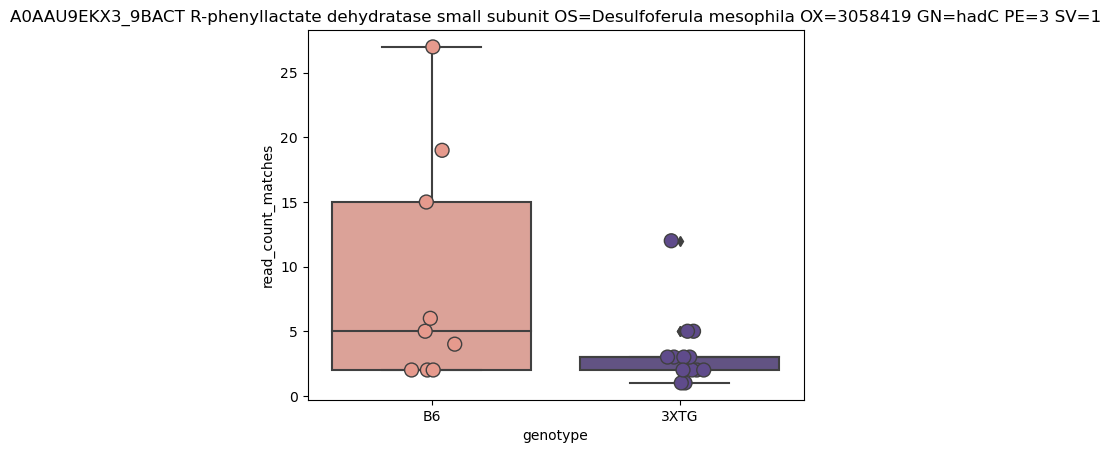

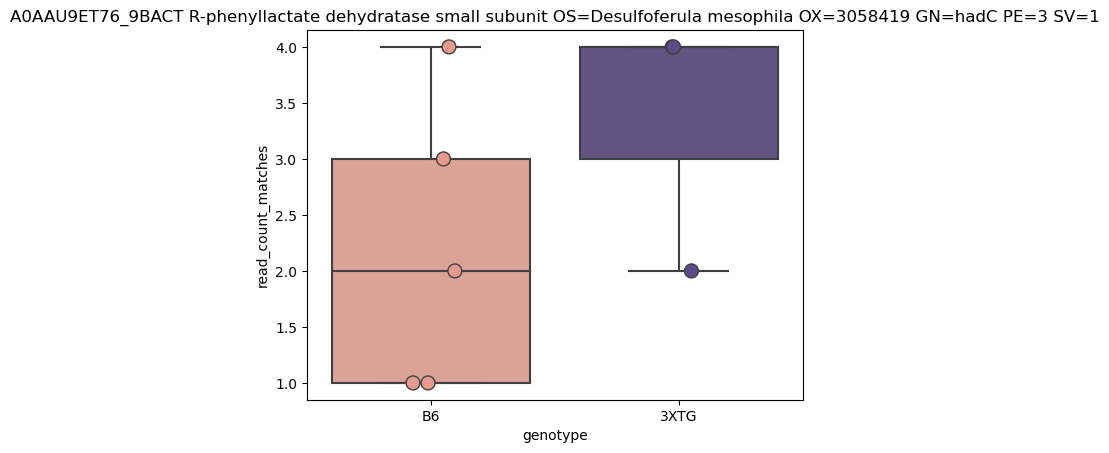

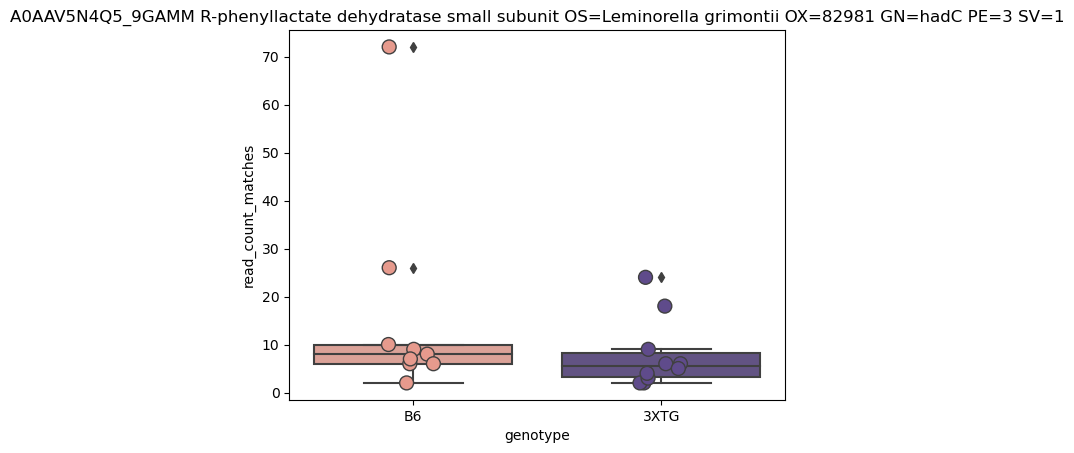

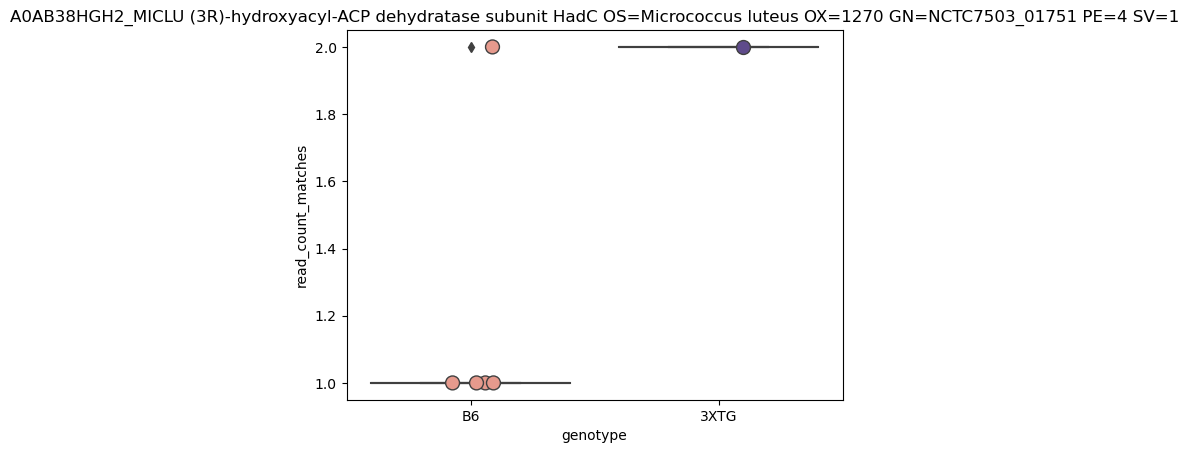

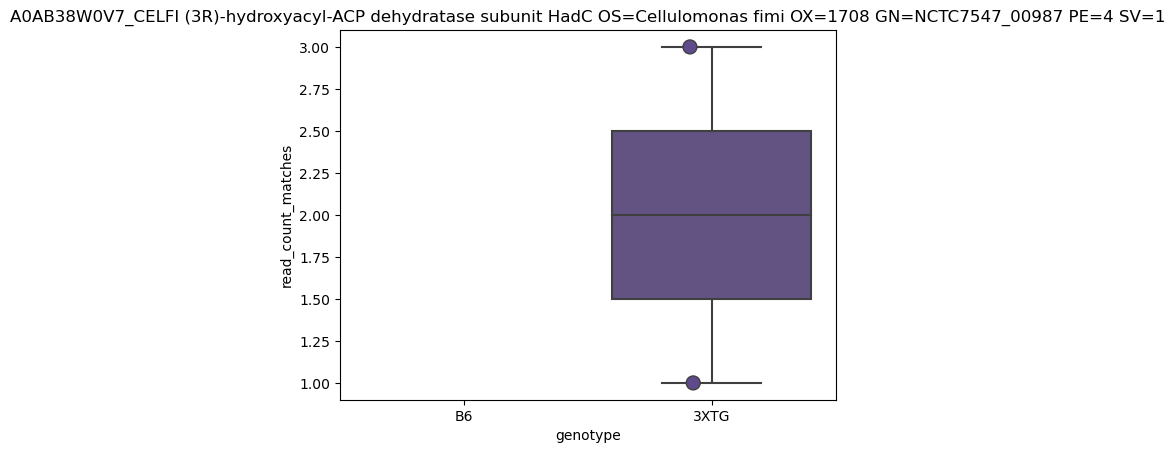

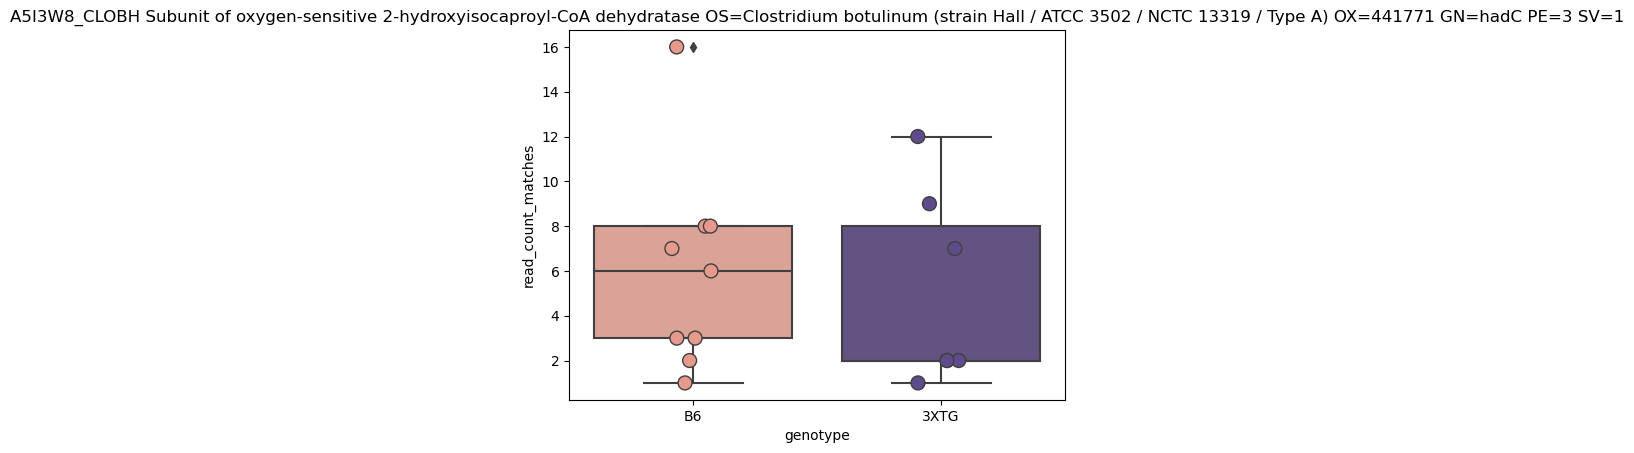

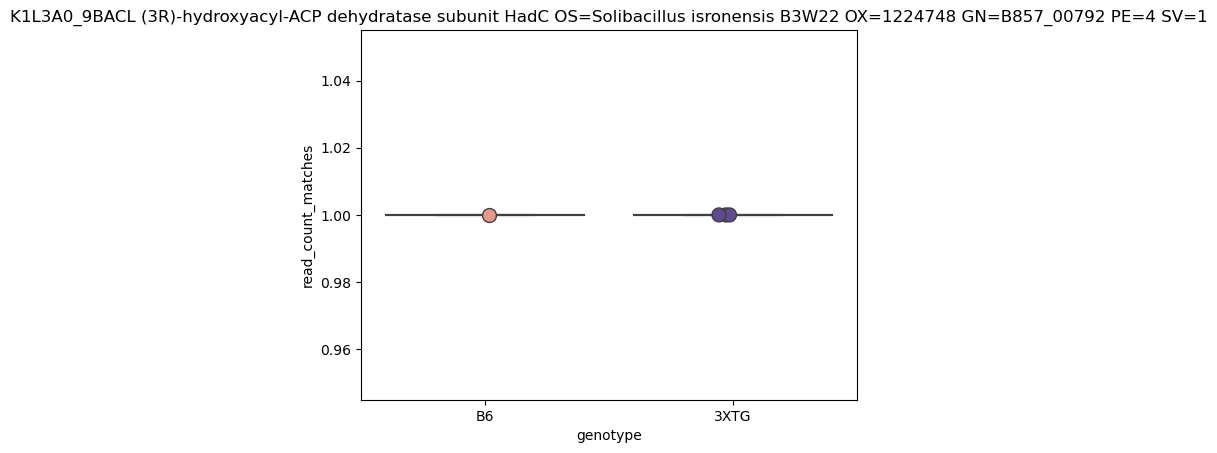

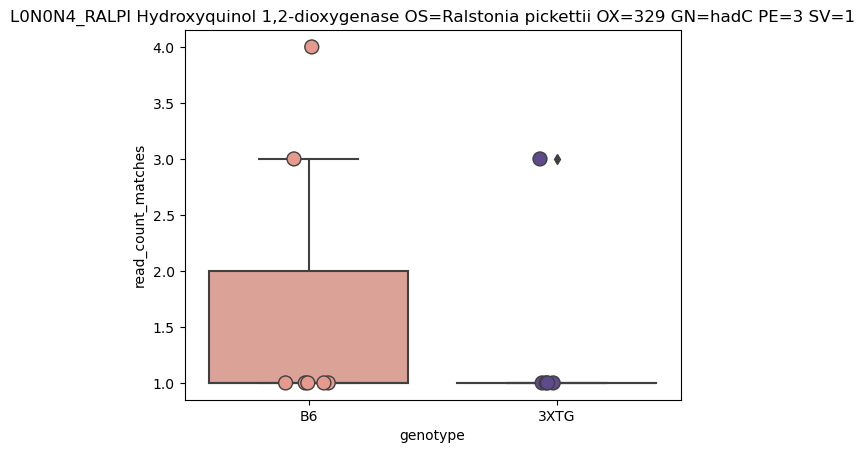

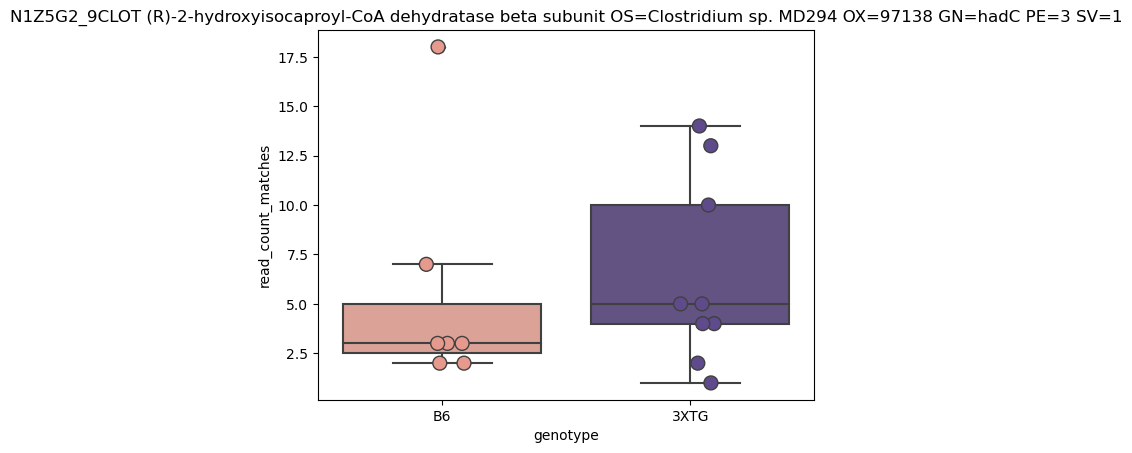

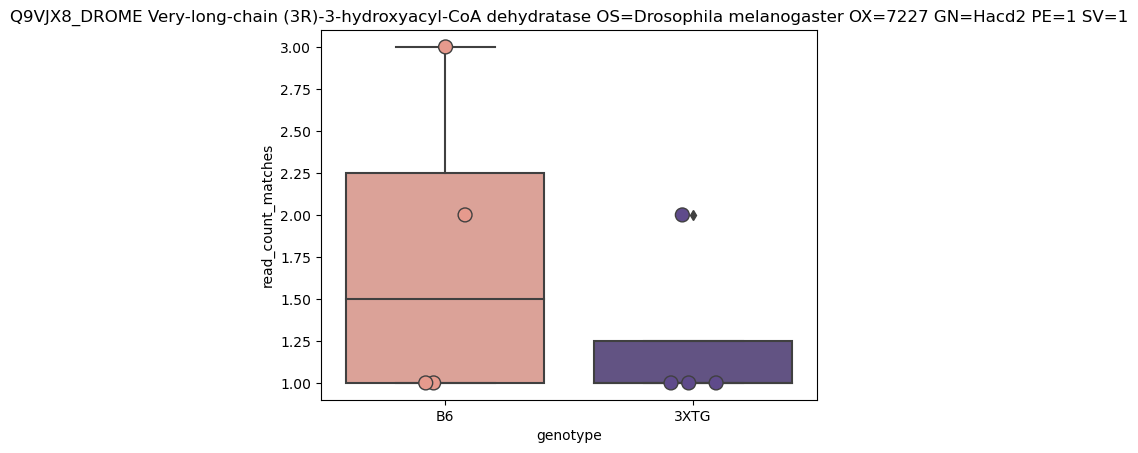

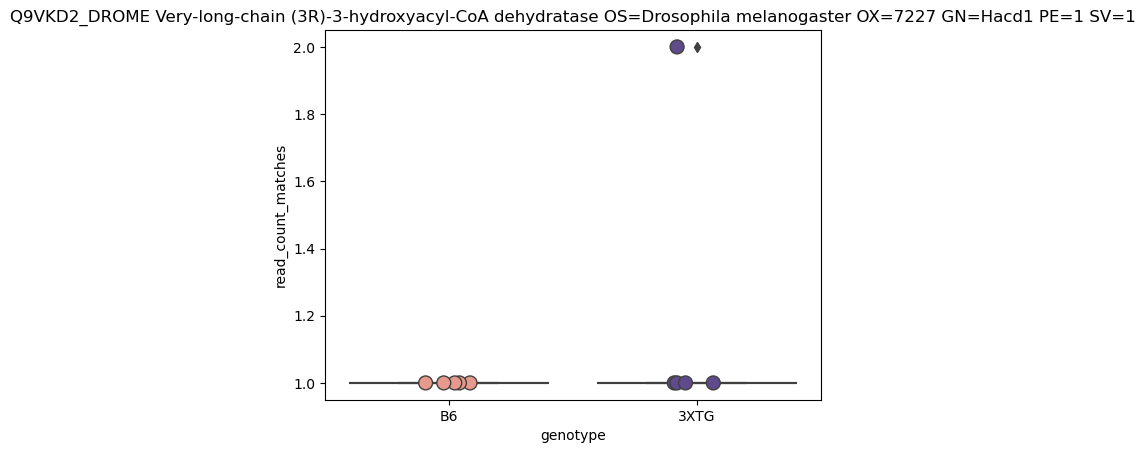

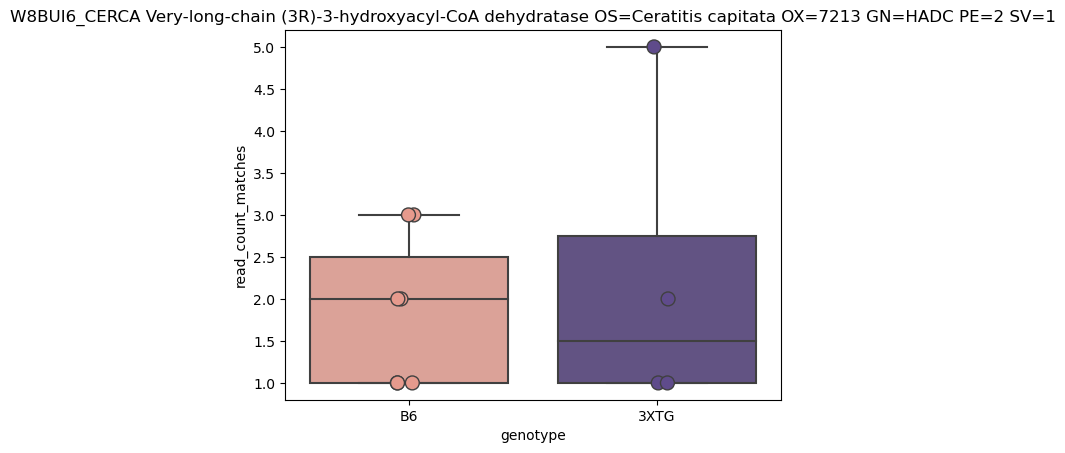

In [146]:
for x in hadC_plotting5.stitle.unique():
    g = sns.boxplot(data=hadC_plotting5[hadC_plotting5.stitle==x], 
                    x='genotype', y='read_count_matches',
                   order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
    g = sns.stripplot(data=hadC_plotting5[hadC_plotting5.stitle==x], 
                      x='genotype', y='read_count_matches',
                     s=10, linewidth=1, order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
    tle = x.split("|")
    tle2 = tle[-1]
    plt.title(tle2)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('../figures/hadC_boxscatter_%s.png' % tle, dpi=150, bbox_inches='tight')
    plt.show()

### bsh

In [38]:
bsh_indv = pd.read_csv('../data/Microbiome/genes_of_interest/bsh-NZ_CP038996.1-E.faecium/3xtg_indv_bsh_blastx_matches.csv')
bsh_indv.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,qstart,qtitle,send,slen,sseqid,sstart,stitle
0,50.4,2.310000e-12,0,363131289,42,17,59.5,127,129,A00953:711:H3W2YDSX7:4:1103:15338:28307,2,A00953:711:H3W2YDSX7:4:1103:15338:28307,74,91,tr|A0A170XDL4|A0A170XDL4_TRIIF,33,tr|A0A170XDL4|A0A170XDL4_TRIIF ATP-binding cas...
1,32.7,3.330000e-05,0,363131289,27,13,51.9,16,118,A00953:711:H3W2YDSX7:4:1104:22182:31078,96,A00953:711:H3W2YDSX7:4:1104:22182:31078,452,1312,tr|L7FN93|L7FN93_ENTIV,426,"tr|L7FN93|L7FN93_ENTIV Bile salt export pump, ..."
2,40.0,1.390000e-07,0,363131289,32,13,59.4,136,151,A00953:711:H3W2YDSX7:4:1112:29604:35884,41,A00953:711:H3W2YDSX7:4:1112:29604:35884,1224,1377,tr|N1QGJ7|N1QGJ7_SPHMS,1193,tr|N1QGJ7|N1QGJ7_SPHMS Bile salt export pump O...
3,70.9,1.730000e-18,0,363131289,49,16,67.3,149,151,A00953:711:H3W2YDSX7:4:1113:22516:8422,3,A00953:711:H3W2YDSX7:4:1113:22516:8422,1258,1304,tr|B0E723|B0E723_ENTDS,1210,"tr|B0E723|B0E723_ENTDS Bile salt export pump, ..."
4,52.8,4.000000e-13,0,363131289,47,21,55.3,148,151,A00953:711:H3W2YDSX7:4:1116:23357:20838,8,A00953:711:H3W2YDSX7:4:1116:23357:20838,82,91,tr|A0A170XDL4|A0A170XDL4_TRIIF,36,tr|A0A170XDL4|A0A170XDL4_TRIIF ATP-binding cas...


In [68]:
bsh_indv.shape

(2420419, 17)

In [70]:
bsh_indv2 = bsh_indv[bsh_indv['stitle'].str.contains("bile|bsh")].copy()
bsh_indv2.shape

(57056, 17)

In [71]:
bsh_ind_md = pd.merge(bsh_indv2, metadata[['tube_id2', 'genotype_sex', 'genotype', 'study_type']], 
                       left_on='identification', right_on='tube_id2')
bsh_ind_md.head()

,bitscore,evalue,gapopen,identification,length,mismatch,pident,qend,qlen,qseqid,...,qtitle,send,slen,sseqid,sstart,stitle,tube_id2,genotype_sex,genotype,study_type
0,52.0,7.940000e-12,0,363131289,49,25,49.0,2,151,A00953:711:H3W2YDSX7:4:1143:25708:30514,...,A00953:711:H3W2YDSX7:4:1143:25708:30514,249,328,tr|A0A9D1UN62|A0A9D1UN62_9FIRM,201,tr|A0A9D1UN62|A0A9D1UN62_9FIRM choloylglycine ...,363131289.0,3XTG_female,3XTG,Longitudinal
1,73.9,1.100000e-19,0,363131289,44,7,84.1,1,134,A00953:711:H3W2YDSX7:4:1168:18566:7999,...,A00953:711:H3W2YDSX7:4:1168:18566:7999,124,451,tr|P97039|P97039_LACJH,81,tr|P97039|P97039_LACJH Putative bile salt tran...,363131289.0,3XTG_female,3XTG,Longitudinal
2,52.0,7.770000e-12,1,363131289,33,6,78.8,149,151,A00953:711:H3W2YDSX7:4:1172:25391:24330,...,A00953:711:H3W2YDSX7:4:1172:25391:24330,32,451,tr|P97039|P97039_LACJH,1,tr|P97039|P97039_LACJH Putative bile salt tran...,363131289.0,3XTG_female,3XTG,Longitudinal
3,97.4,1.450000e-28,0,363131289,49,1,98.0,5,151,A00953:711:H3W2YDSX7:4:1220:27145:30405,...,A00953:711:H3W2YDSX7:4:1220:27145:30405,270,316,sp|A5HKP3|CBH_LACAI,222,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,363131289.0,3XTG_female,3XTG,Longitudinal
4,82.8,9.770000e-23,0,363131289,49,8,83.7,149,151,A00953:711:H3W2YDSX7:4:1312:21359:17534,...,A00953:711:H3W2YDSX7:4:1312:21359:17534,76,451,tr|P97039|P97039_LACJH,28,tr|P97039|P97039_LACJH Putative bile salt tran...,363131289.0,3XTG_female,3XTG,Longitudinal


In [72]:
bsh_ind_md.shape

(57056, 21)

In [73]:
bsh_ind_md2 = bsh_ind_md[bsh_ind_md['pident']>45].copy()
bsh_ind_md2.shape
#should have been pre-filtered for this value

(56987, 21)

In [74]:
bsh_ind_sac = bsh_ind_md2[bsh_ind_md2['study_type']=='Sacrifice'].copy()
bsh_ind_sac.shape

(27959, 21)

In [75]:
bsh_ind_sac_min = bsh_ind_sac[['stitle', 'genotype_sex', 'pident']].copy()
bsh_ind_sac_min.head()

,stitle,genotype_sex,pident
138,tr|P97039|P97039_LACJH Putative bile salt tran...,B6_female,95.9
139,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,B6_female,98.0
140,tr|P97039|P97039_LACJH Putative bile salt tran...,B6_female,100.0
141,tr|P97039|P97039_LACJH Putative bile salt tran...,B6_female,96.0
142,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,B6_female,98.0


In [76]:
bsh_summary = bsh_ind_sac_min.groupby(['stitle', 'genotype_sex']).count()
bsh_summary.reset_index()

,stitle,genotype_sex,pident
0,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG_female,2398
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG_male,2709
2,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,B6_female,1537
3,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,B6_male,591
4,tr|A0A0A1E9N9|A0A0A1E9N9_LIMFE Choloylglycine ...,B6_male,1
...,...,...,...
194,tr|X0PB25|X0PB25_9LACO Conjugated bile salt hy...,3XTG_male,1
195,tr|X0QEK2|X0QEK2_9LACO Conjugated bile salt hy...,3XTG_female,34
196,tr|X0QEK2|X0QEK2_9LACO Conjugated bile salt hy...,3XTG_male,3
197,tr|X0QEK2|X0QEK2_9LACO Conjugated bile salt hy...,B6_female,10


In [77]:
len(bsh_summary.reset_index().stitle.unique())

65

In [78]:
bsh_summary.to_csv('../data/Microbiome/genes_of_interest/bsh-NZ_CP038996.1-E.faecium/3xtg_indv_bsh_summary_counts.csv')

In [79]:
bsh_ind_sac_gtp = bsh_ind_sac[['stitle', 'genotype', 'pident']].copy()
bsh_ind_sac_gtp.head()

,stitle,genotype,pident
138,tr|P97039|P97039_LACJH Putative bile salt tran...,B6,95.9
139,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,B6,98.0
140,tr|P97039|P97039_LACJH Putative bile salt tran...,B6,100.0
141,tr|P97039|P97039_LACJH Putative bile salt tran...,B6,96.0
142,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,B6,98.0


In [80]:
bsh_ind_sac_gtp.groupby(['stitle', 'genotype']).count()

pident
stitle                                             genotype        
sp|A5HKP3|CBH_LACAI Conjugated bile acid hydrol... 3XTG        5107
                                                   B6          2128
tr|A0A0A1E9N9|A0A0A1E9N9_LIMFE Choloylglycine h... B6             1
tr|A0A0C1PNV8|A0A0C1PNV8_9LACO Conjugated bile ... 3XTG           2
                                                   B6            15
...                                                             ...
tr|Q1MK66|Q1MK66_RHIJ3 Conjugated bile salt hyd... 3XTG          79
                                                   B6           180
tr|X0PB25|X0PB25_9LACO Conjugated bile salt hyd... 3XTG           1
tr|X0QEK2|X0QEK2_9LACO Conjugated bile salt hyd... 3XTG          37
                                                   B6            13

[119 rows x 1 columns]

In [81]:
bsh_ind_sac_gtp.groupby(['stitle', 'genotype']).count().to_csv('../data/Microbiome/genes_of_interest/bsh-NZ_CP038996.1-E.faecium/3xtg_indv_bsh_summary_counts_genotype.csv')

In [82]:
bsh_ind_sac_gtp2 = bsh_ind_sac_gtp.groupby(['stitle', 'genotype']).count().reset_index()
bsh_ind_sac_gtp3 = bsh_ind_sac_gtp2[bsh_ind_sac_gtp2['stitle'].str.contains('actobacillus', case=False, na=False)]
bsh_ind_sac_gtp3.head()

,stitle,genotype,pident
0,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG,5107
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,B6,2128
2,tr|A0A0A1E9N9|A0A0A1E9N9_LIMFE Choloylglycine ...,B6,1
3,tr|A0A0C1PNV8|A0A0C1PNV8_9LACO Conjugated bile...,3XTG,2
4,tr|A0A0C1PNV8|A0A0C1PNV8_9LACO Conjugated bile...,B6,15


In [83]:
bsh_ind_sac_gtp3.to_csv('../data/Microbiome/genes_of_interest/bsh-NZ_CP038996.1-E.faecium/3xtg_indv_bsh_summary_counts_genotype_lactobacillus.csv')

In [57]:
#possible versions of interest
slist = ['A5HKP3', 'A0A267MB76', 'A0A6A7K2P7', 'A0AAD0P8C1', 'E4SJ30', 'P97039',
        'A0A0P0ENF5', 'A0A140DWG5', 'A0A2A2EEP', 'Q53CP6']

In [84]:
bsh_plotting = pd.merge(bsh_indv2, metadata[['tube_id2', 'genotype', 'study_type', 'host_subject_id']], 
                       left_on='identification', right_on='tube_id2')
bsh_plotting2 = bsh_plotting[bsh_plotting['pident']>60].copy()
bsh_plotting3 = bsh_plotting2[bsh_plotting2['evalue']<0.00001].copy()
bsh_plotting4 = bsh_plotting3[bsh_plotting3['length']>20].copy()
bsh_plotting5 = bsh_plotting4[bsh_plotting4['study_type']=='Sacrifice'].copy()
bsh_plotting6 = bsh_plotting5[['stitle', 'genotype', 'tube_id2', 'pident']].copy()
bsh_plotting7 = bsh_plotting6.groupby(['stitle', 'genotype', 'tube_id2']).count().reset_index()
bsh_plotting7.rename(columns={'pident':'read_count_matches'}, inplace=True)
bsh_plotting7.head()

,stitle,genotype,tube_id2,read_count_matches
0,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG,363141305.0,8
1,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG,363141306.0,8
2,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG,363141310.0,13
3,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG,363141325.0,19
4,sp|A5HKP3|CBH_LACAI Conjugated bile acid hydro...,3XTG,363141326.0,2


/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

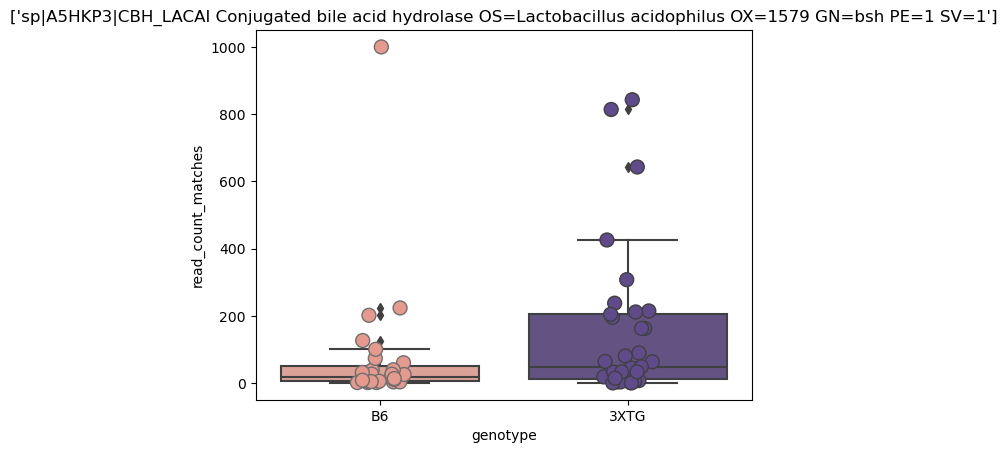

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

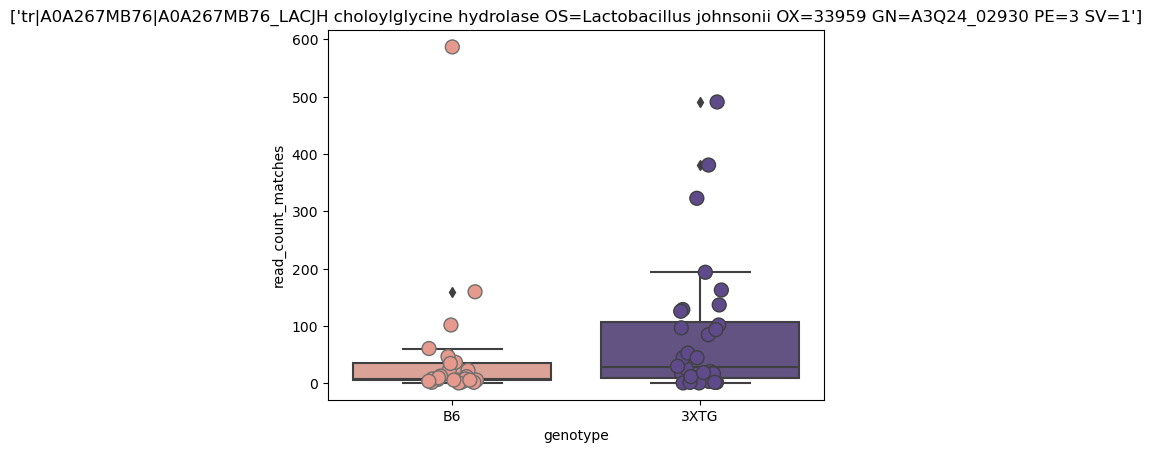

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

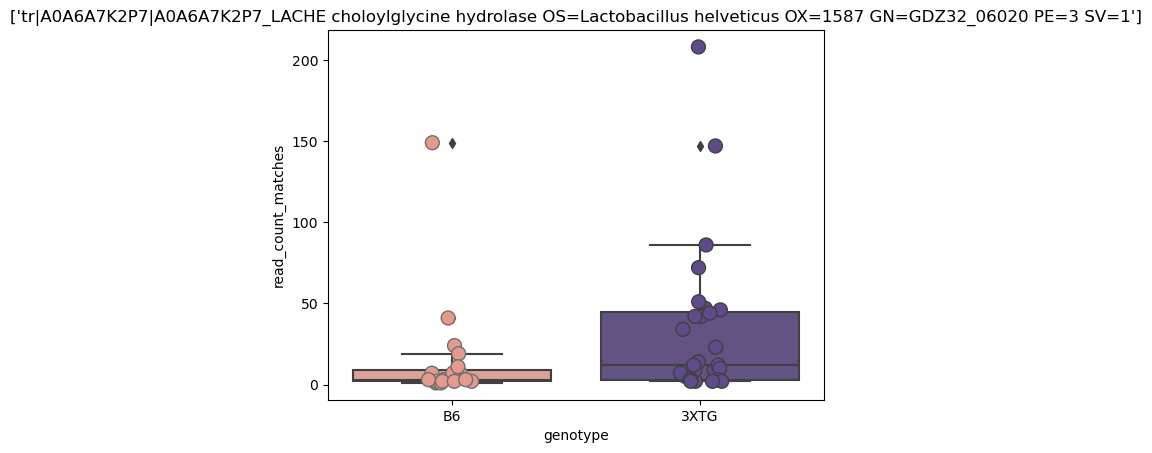

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

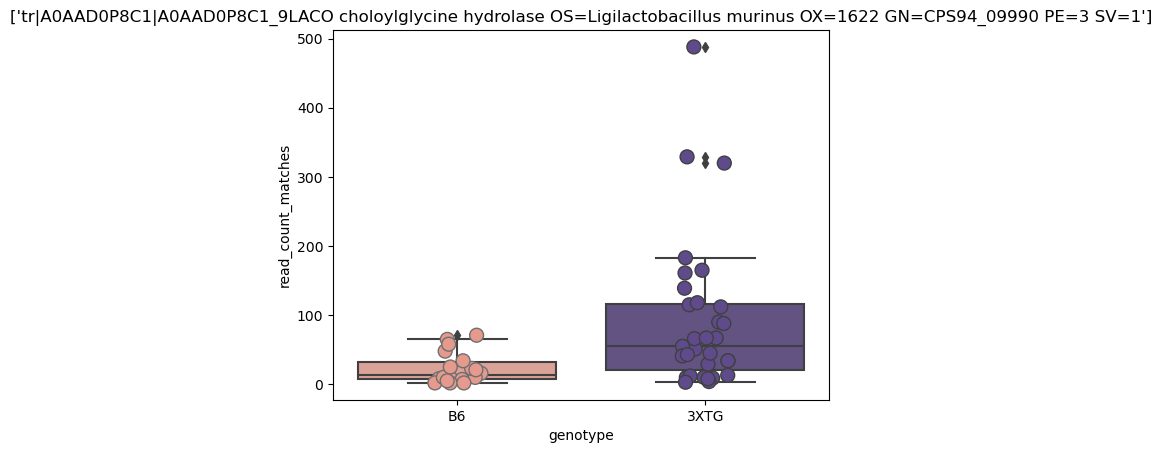

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

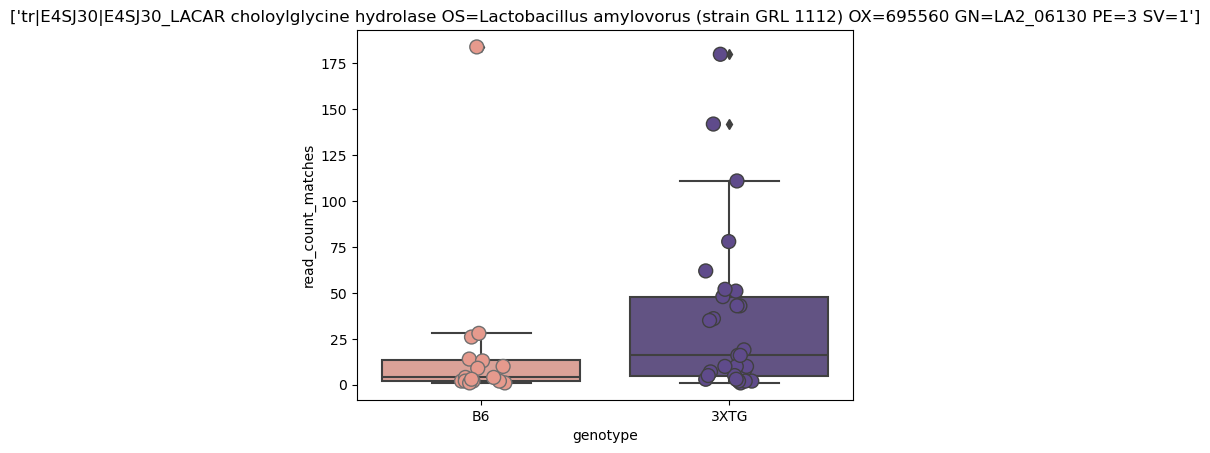

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

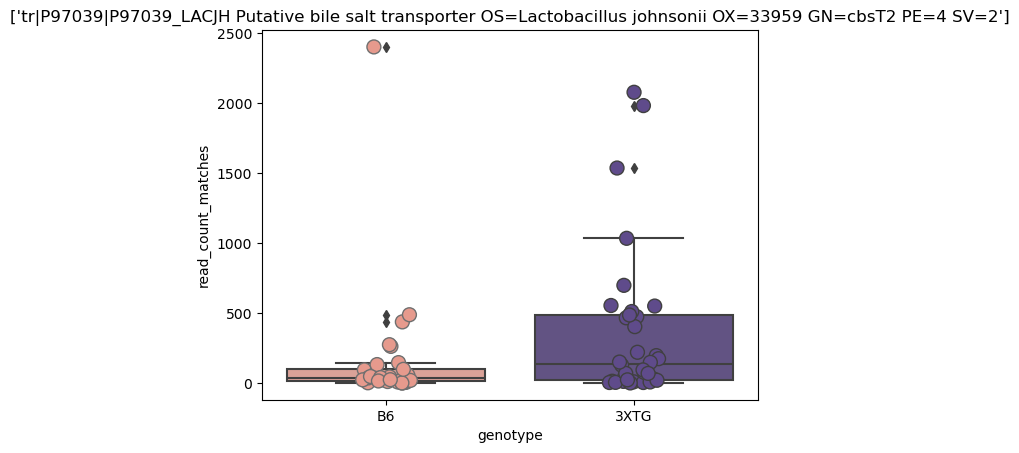

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

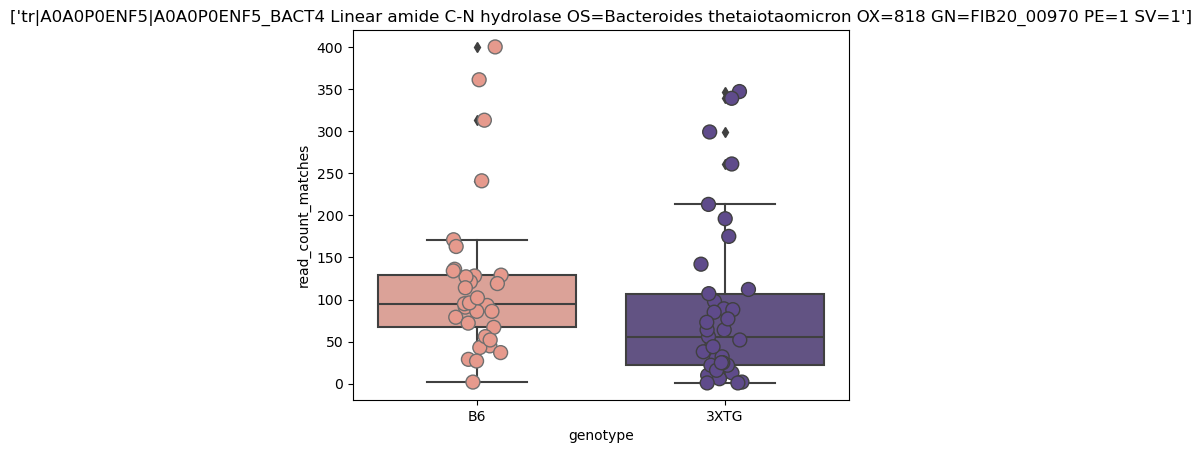

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

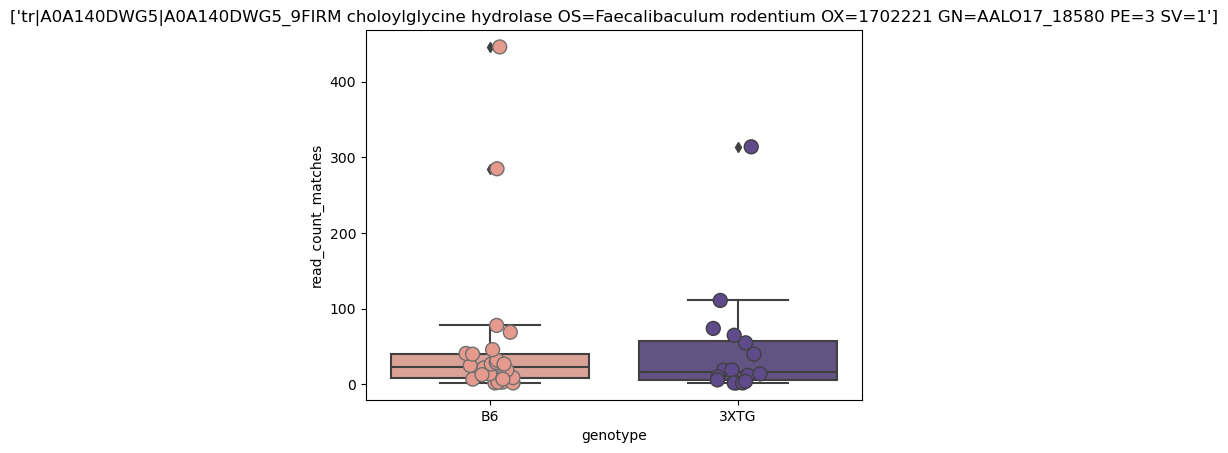

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

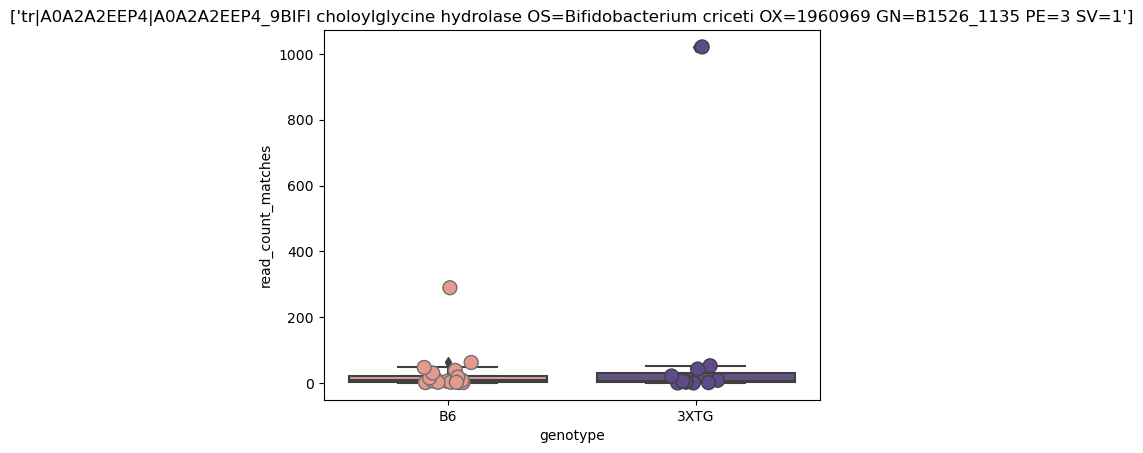

/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/1834338036.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)],
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a 

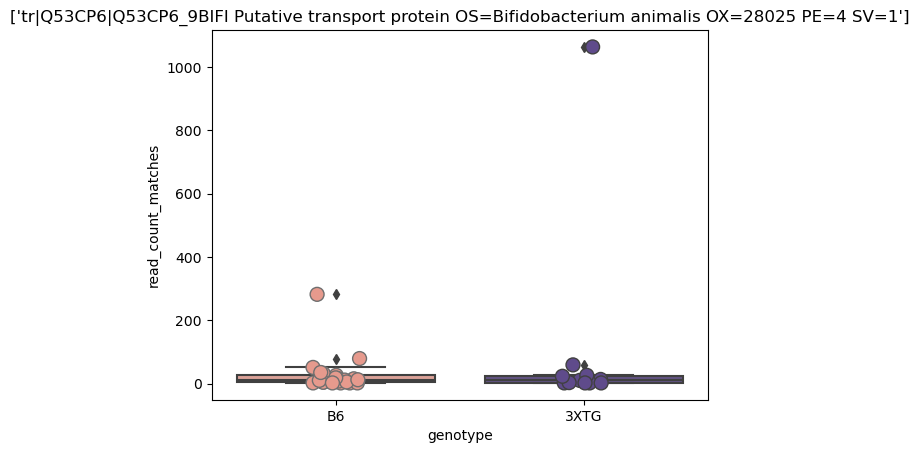

In [58]:
for x in slist:
    bsh_tb = bsh_plotting7[bsh_plotting7.stitle.str.contains(x, case=False, na=False)].copy()
    g = sns.boxplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)], 
                    x='genotype', y='read_count_matches',
                   order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
    g = sns.stripplot(data=bsh_tb[bsh_tb.stitle.str.contains(x, case=False, na=False)], 
                      x='genotype', y='read_count_matches',
                     s=10, linewidth=1, order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
    plt.title(bsh_tb.stitle.unique())
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/bsh_sfilt_boxscatter_%s.png' % x, dpi=150, bbox_inches='tight')
    plt.show()

In [ ]:
# need to normalize for read depth of sample?

In [85]:
bsh_ind_sac_gtp4 = bsh_ind_sac_gtp[['genotype', 'pident']].groupby(['genotype']).count().reset_index()
bsh_ind_sac_gtp4.rename(columns={'pident':'read_count_matches'}, inplace=True)
bsh_ind_sac_gtp4.head()

,genotype,read_count_matches
0,3XTG,19526
1,B6,8433


In [86]:
bsh_plotting = pd.merge(bsh_indv2, metadata[['tube_id2', 'genotype', 'study_type', 'host_subject_id', 'host_age']], 
                       left_on='identification', right_on='tube_id2')
bsh_plotting2 = bsh_plotting[bsh_plotting['pident']>60].copy()
bsh_plotting3 = bsh_plotting2[bsh_plotting2['evalue']<0.00001].copy()
bsh_plotting4 = bsh_plotting3[bsh_plotting3['length']>20].copy()
bsh_plotting5 = bsh_plotting4[bsh_plotting4['study_type']=='Sacrifice'].copy()
bsh_plotting6 = bsh_plotting5[['genotype', 'tube_id2', 'host_age', 'pident']].copy()
bsh_plotting7 = bsh_plotting6.groupby(['genotype', 'host_age', 'tube_id2']).count().reset_index()
bsh_plotting7.rename(columns={'pident':'read_count_matches'}, inplace=True)
bsh_plotting7.head()

,genotype,host_age,tube_id2,read_count_matches
0,3XTG,7.0,363141325.0,74
1,3XTG,7.0,363141326.0,20
2,3XTG,7.0,363141328.0,177
3,3XTG,7.0,363141329.0,1508
4,3XTG,7.0,363141338.0,307


/var/folders/3b/vgfxgx4j1hn384yg_whm02qc0000gp/T/ipykernel_39927/2394841329.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g = sns.stripplot(data=bsh_plotting7, x='genotype', y='read_count_matches',
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1

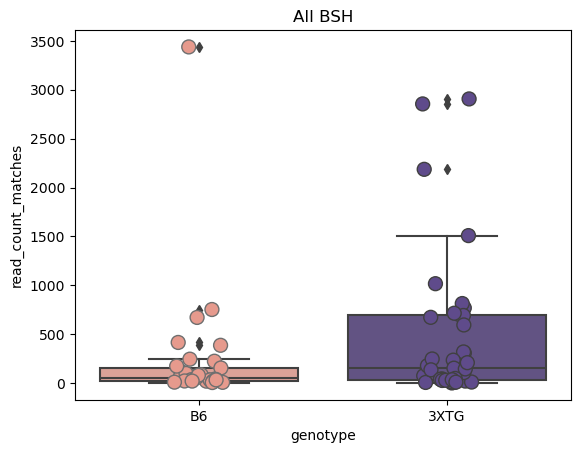

In [93]:
g = sns.boxplot(data=bsh_plotting7, x='genotype', y='read_count_matches',
               order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
g = sns.stripplot(data=bsh_plotting7, x='genotype', y='read_count_matches',
                 s=10, linewidth=1, order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
plt.title("All BSH")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/bsh-all_sfilt_boxstrip_mwu-p0.11.png', dpi=150, bbox_inches='tight')

In [134]:
from scipy.stats import mannwhitneyu

In [87]:
B6 = bsh_plotting7[bsh_plotting7['genotype']=='B6'].read_count_matches.values
XTG = bsh_plotting7[bsh_plotting7['genotype']=='3XTG'].read_count_matches.values
mannwhitneyu(B6, XTG, method="exact")

MannwhitneyuResult(statistic=458.0, pvalue=0.10852545011082528)

/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/callaband/miniforge3/envs/qiime2-amplicon-2024.5/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


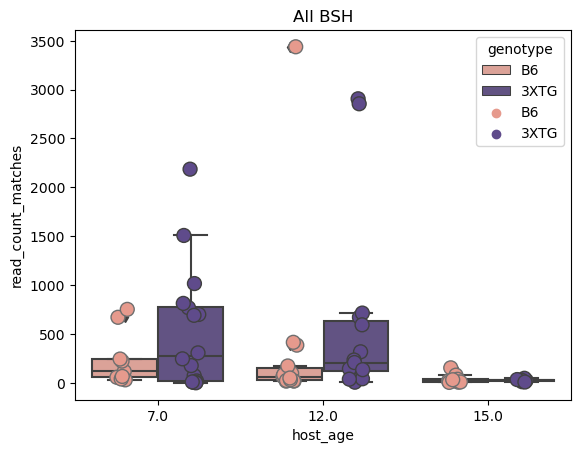

In [90]:
g = sns.boxplot(data=bsh_plotting7, x='host_age', hue='genotype', y='read_count_matches',
               hue_order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
g = sns.stripplot(data=bsh_plotting7, x='host_age', hue='genotype', y='read_count_matches',
                 s=10, linewidth=1, dodge=True,
                  hue_order=['B6', '3XTG'], palette=['#E69A8D','#5F4B8B'])
plt.title("All BSH")
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/bsh-all_sfilt_boxscatter_tps.png', dpi=150, bbox_inches='tight')

In [91]:
bsh_plotting7

,genotype,host_age,tube_id2,read_count_matches
0,3XTG,7.0,363141325.0,74
1,3XTG,7.0,363141326.0,20
2,3XTG,7.0,363141328.0,177
3,3XTG,7.0,363141329.0,1508
4,3XTG,7.0,363141338.0,307
...,...,...,...,...
64,B6,15.0,363141345.0,7
65,B6,15.0,363141350.0,20
66,B6,15.0,363141745.0,5
67,B6,15.0,363141752.0,9


In [92]:
bsh_plotting7.to_csv('../data/Microbiome/genes_of_interest/bsh-NZ_CP038996.1-E.faecium/bsh_summary_count_sfilt_sac-genotype_tube.csv', index=False)